In [1]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

## Set input and output folders 

In [2]:
# analysis folder version  
analysis_version = '007'


In [3]:
out_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis',
                        analysis_version, 
                        '002_video_vs_mat_metrics_V2')

if not os.path.exists(out_path): 
    os.makedirs(out_path)

### Load Clean Data - no missing BW Data 
May be missing video data - see excel with counts 

Only participants with MS 

7/2025: switch to 000_merged_cleaned_data_temp for looking at accuracy of videos with assistive devices, multiple people, etc 

In [4]:
# fw 
zv_pws_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                    analysis_version, 
                                    '000_merged_cleaned_data_temp\zv_bw_merged_gait_vertical_PWS_1_clean.csv')
zv_pws_bw_clean_df = pd.read_csv(zv_pws_bw_clean_path, index_col = 0)

# FW 
zv_fw_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                    analysis_version, 
                                   '000_merged_cleaned_data_temp\zv_bw_merged_gait_vertical_FW_1_clean.csv') 
zv_fw_bw_clean_df = pd.read_csv(zv_fw_bw_clean_path, index_col = 0) 

# Home Videos 
hv_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                analysis_version, 
                                '000_merged_cleaned_data_temp\hv_bw_merged_clean.csv') 

hv_bw_clean_df = pd.read_csv(hv_bw_clean_path, index_col = 0) 

## Columns to compare 
Column pairs to evaluate metrics that should/count be 1:1, not proxy velocity measures  
For each of the column pairs below (zv 1 vs bw1, zv 2 vs bw 3, etc), run and save correlation 

In [5]:
# zeno video metrics 
zv_colnames = ['stride_time_median_sec_pose_zv', 
            #   'stride_time_mean_sec_pose_zv',
            #   'gait_cycle_time_sec_median_pose_zv',
            #   'stride_time_cv_pose_zv', 
               'mean_cadence_step_per_min_pose_zv',
               'stride_width_median_cm_pose_zv',
               'singlesupport_per_mean_pose_zv',
               'tot_dsupport_per_mean_pose_zv',
            #   'tot_dsupport_per_median_pose_zv',
               ]
            #   'singlesupport_per_median_pose_zv',
            #   'stride_width_mean_cm_pose_zv',
            #   'stride_width_std_pose_zv']

# home video metrics 
hv_colnames = ['stride_time_median_sec_pose_hv', 
            #   'stride_time_mean_sec_pose_hv',
            #   'gait_cycle_time_sec_median_pose_hv', 
            #   'stride_time_cv_pose_hv', 
               'mean_cadence_step_per_min_pose_hv',
               'stride_width_median_cm_pose_hv',
               'singlesupport_per_mean_pose_hv',
               'tot_dsupport_per_mean_pose_hv']
            #   'tot_dsupport_per_median_pose_hv',
               
            #   'singlesupport_per_median_pose_hv',
            #   'stride_width_mean_cm_pose_hv',
            #   'stride_width_std_pose_hv']

# Zeno mat preferred walking speed metrics 
bw_pws_colnames = ['PWS_stridetimesecmean', 
                 #  'PWS_stridetimesecmean',
                 #  'PWS_stridetimesecmean',
                 #  'PWS_stridetimeseccv',
                   'PWS_cadencestepsminmean',
                   'PWS_stridewidthcmmean',
                    'PWS_singlesupportmean',
                   'PWS_totaldsupportmean']
                 #  'PWS_totaldsupportmean',
                
                 #  'PWS_singlesupportmean',
                 #  'PWS_stridewidthcmmean',
                  # 'PWS_stridewidthcmsd']

# Zeno mat fast walking speed metrics 
bw_fw_colnames = ['FW_stridetimesecmean', 
                #  'FW_stridetimesecmean', 
                #  'FW_stridetimesecmean', 
                #  'FW_stridetimeseccv',
                   'FW_cadencestepsminmean',
                  'FW_stridewidthcmmean',
                  'FW_singlesupportmean',
                   'FW_totaldsupportmean']
                 # 'FW_totaldsupportmean',
                   
                #  'FW_singlesupportmean',
                #  'FW_stridewidthcmmean',
                #   'FW_stridewidthcmsd']

units = ['seconds',
     #    'seconds',
      #   'seconds',
       #  'CV%',
         'steps/min',
        'cm',
         '%',
         '%']
#  '%',
       #  '%',
       #  'cm',
       #  'cm']

# Save file with all errors per video  

In [6]:
def save_error_per_vid(df, video_columns, bw_columns, output_folder_path):
    
    if not os.path.exists(os.path.join(output_folder_path)):
        os.makedirs(os.path.join(output_folder_path))

    for metric_i, current_metric in enumerate(video_columns): 
        current_vid_col = video_columns[metric_i]
        current_bw_col = bw_columns[metric_i]
        
        new_col_name = f"{current_vid_col}_error" 
        df[new_col_name] = df[current_vid_col] - df[current_bw_col]

    return df

In [7]:
# set saving error output folder 
save_error_out_path = os.path.join(out_path, 'save_all_error')
print(save_error_out_path)

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis\007\002_video_vs_mat_metrics_V2\save_all_error


In [8]:
# Save PWS errors  
zv_pws_errors_all_df = save_error_per_vid(df = zv_pws_bw_clean_df,
                                          video_columns = zv_colnames, 
                                          bw_columns = bw_pws_colnames,
                                          output_folder_path = save_error_out_path)

zv_pws_errors_all_df.to_csv(os.path.join(save_error_out_path, 'zeno_pws_all_errors.csv'))

In [9]:
# Save FW errors  
zv_fw_errors_all_df = save_error_per_vid(df = zv_fw_bw_clean_df,
                                          video_columns = zv_colnames, 
                                          bw_columns = bw_fw_colnames,
                                          output_folder_path = save_error_out_path)

zv_fw_errors_all_df.to_csv(os.path.join(save_error_out_path, 'zeno_fw_all_errors.csv'))

In [10]:
# home videos 
hv_bw_errors_all_df = save_error_per_vid(df = hv_bw_clean_df,
                                         video_columns = hv_colnames, 
                                         bw_columns = bw_pws_colnames,
                                         output_folder_path = save_error_out_path)

hv_bw_errors_all_df.to_csv(os.path.join(save_error_out_path, 'hv_all_errors.csv'))

# Correlation - compare metrics from two data sources 

In [26]:
# function - correlation 
def metric_correlation(df, video_columns, bw_columns, output_folder_path, subfolder_name, color_col): 
    
    if not os.path.exists(os.path.join(output_folder_path, subfolder_name)):
        os.makedirs(os.path.join(output_folder_path, subfolder_name))
    
    # create empty list to store results 
    corr_results_all = [] 
    clean_df = pd.DataFrame() 
    
    for metric_i, current_metric in enumerate(video_columns): 
        current_vid_col = video_columns[metric_i]
        current_bw_col = bw_columns[metric_i]

        # Drop rows with NaN values in either column - required to run spearman r 
        clean_df = df.dropna(subset=[current_vid_col, current_bw_col])

        # plot 
        plt.figure(figsize=(10, 6))

        # scatterplot 
        if color_col == 'none': 
            sns.scatterplot(x = current_bw_col, y = current_vid_col, 
                            data = clean_df, 
                            alpha = 0.75
                           )
        else: 
          sns.scatterplot(x = current_bw_col, y = current_vid_col, 
                          hue = color_col,
                          data = clean_df, 
                          alpha = 0.75
                          )  

        # Set the x and y axis limits to the same range 
        min_val = min(clean_df[current_vid_col].min(), clean_df[current_vid_col].min())
        max_val = max(clean_df[current_vid_col].max(), clean_df[current_vid_col].max())
        plt.xlim(min_val - (min_val * .3), max_val + (max_val * .3))
        plt.ylim(min_val - (min_val * .3), max_val + (max_val * .3))

        # add BW ID if home video - help diagnose problems 
        if 'home' in subfolder_name: 
            for index, row in clean_df.iterrows(): 
               # print(row) 
                plt.annotate(row['bw_id'], 
                             (row[current_bw_col], 
                              row[current_vid_col]), 
                             fontsize = 6
                            )
    
        # straight line of perfect agreement 
        plt.plot([min_val - (min_val * 0.3), 
                  max_val + (max_val * 0.3)], 
                 [min_val - (min_val * 0.3), 
                  max_val + (max_val * 0.3)], color='lightgrey')
        
        plt.title(subfolder_name)
        
#        plt.legend(loc = 'upper right')
        plt.savefig(os.path.join(output_folder_path, 
                                 subfolder_name, 
                                 str(current_vid_col + '_vs_' + current_bw_col + '.png')))
       # plt.show()
        plt.close()

        # run spearman correlation and append   
        statistic, p_value = stats.spearmanr(clean_df[current_bw_col], clean_df[current_vid_col])
        corr_results_all.append({'bw_column': current_bw_col, 
                                 'video_column': current_vid_col, 
                                 'corr_method': 'spearman' , 
                                 'rs': round(statistic, 2), 
                                 'p_value' : round(p_value, 3),
                                 'n_pairs': len(clean_df)})

    # Create DataFrame with results
    corr_results_df = pd.DataFrame(corr_results_all)
   # corr_results_df = corr_results_df.round(3)

    return corr_results_df


In [12]:
# set correlation output folder 
corr_out_path = os.path.join(out_path, 'correlation')
print(corr_out_path)

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis\007\002_video_vs_mat_metrics_V2\correlation


In [27]:
# PWS 
zv_pws_corr_results_df = metric_correlation(df = zv_pws_bw_clean_df,
                                            video_columns = zv_colnames, 
                                            bw_columns = bw_pws_colnames,
                                            output_folder_path = corr_out_path, 
                                            subfolder_name = 'zeno_pws_scatterplots', 
                                            color_col = 'none')

zv_pws_corr_results_df.to_csv(os.path.join(corr_out_path, 'zeno_pws_spearman_corr.csv'))

In [28]:
# FW
zv_fw_corr_results_df = metric_correlation(df = zv_fw_bw_clean_df, 
                                           video_columns = zv_colnames, 
                                           bw_columns = bw_fw_colnames, 
                                           output_folder_path = corr_out_path, 
                                           subfolder_name = 'zeno_fw_scatterplots', 
                                           color_col = 'none'
                                          )
zv_fw_corr_results_df.to_csv(os.path.join(corr_out_path, 'zeno_fw_spearman_corr.csv'))

## Home Videos Correlation 
Video metric with most recent in-person data 

In [15]:
# Add delta pixel vs velocity correlation comparison 
hv_colnames_2 = hv_colnames
hv_colnames_2.append('delta_pix_h_rel_median_pose_hv')
print(hv_colnames_2)

bw_pws_colnames_2 = bw_pws_colnames
bw_pws_colnames_2.append('PWS_velocitycmsecmean')
print(bw_pws_colnames_2)

['stride_time_median_sec_pose_hv', 'mean_cadence_step_per_min_pose_hv', 'stride_width_median_cm_pose_hv', 'singlesupport_per_mean_pose_hv', 'tot_dsupport_per_mean_pose_hv', 'delta_pix_h_rel_median_pose_hv']
['PWS_stridetimesecmean', 'PWS_cadencestepsminmean', 'PWS_stridewidthcmmean', 'PWS_singlesupportmean', 'PWS_totaldsupportmean', 'PWS_velocitycmsecmean']


### Home Videos - All 

In [29]:
# Home Videos - all pairs with data, right and left turns 
hv_corr_results_df = metric_correlation(df = hv_bw_clean_df,
                                        video_columns = hv_colnames_2, 
                                        bw_columns = bw_pws_colnames_2, 
                                        output_folder_path = corr_out_path,
                                        subfolder_name = 'home_scatterplots',
                                        color_col = 'none'
                                       )
hv_corr_results_df.to_csv(os.path.join(corr_out_path, 'home_spearman_corr.csv'))
hv_corr_results_df

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [33]:
# Color plots by date diff between home video and zeno walkway 
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byZenoDateDiff',
                    color_col = 'hv_zeno_walk_date_diff'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [34]:
# correlation and plots for date diff <90 
hv_bw_clean_df_wIn90 = hv_bw_clean_df.loc[hv_bw_clean_df['hv_zeno_walk_date_diff'] <= 90] 

hv_corr_results_df_wIn90 =  metric_correlation(df = hv_bw_clean_df_wIn90,
                                               video_columns = hv_colnames_2,
                                               bw_columns = bw_pws_colnames_2, 
                                               output_folder_path = corr_out_path,
                                               subfolder_name = 'home_scatterplots_wIn90Days',
                                               color_col = 'hv_zeno_walk_date_diff'
                                               )

hv_corr_results_df_wIn90.to_csv(os.path.join(corr_out_path, 'home_spearman_corr_wIn90Days.csv'))

In [35]:
# Color plots by lighting 
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byLighting',
                   color_col = 'lighting'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [36]:
# Color plots by lighting 
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byLightSource',
                   color_col = 'light_source'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [38]:
# Color plots by multiple people  
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byMultPpl',
                   color_col = 'multiple_people'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [39]:
# Color plots by assistive device  
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byAD',
                   color_col = 'assistive_device_YN'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [40]:
# correlation and plots only people without AD 
hv_bw_clean_df_noAD = hv_bw_clean_df.loc[hv_bw_clean_df['assistive_device_YN'] == 'N']  

hv_corr_results_df_noAD =  metric_correlation(df = hv_bw_clean_df_noAD,
                                               video_columns = hv_colnames_2,
                                               bw_columns = bw_pws_colnames_2, 
                                               output_folder_path = corr_out_path,
                                               subfolder_name = 'home_scatterplots_noAD',
                                               color_col = 'assistive_device_YN'
                                               )

hv_corr_results_df_noAD.to_csv(os.path.join(corr_out_path, 'home_spearman_corr_noID.csv'))
hv_corr_results_df_noAD

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.49    0.000       66  
1  0.25    0.042       66  
2  0.33    0.006       66  
3 -0.17    0.172       63  
4 -0.07    0.582       63  
5  0.43    0.000       66

In [41]:
# Color plots by home vs clinc 
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byHomeClinic',
                   color_col = 'home_or_clinic'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [42]:
# Color plots by mp plots spinnin y/n
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_bySpinning',
                   color_col = 'mp_spinning'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

In [43]:
# Color plots by average number of footfalls 
metric_correlation(df = hv_bw_clean_df,
                   video_columns = hv_colnames_2, 
                   bw_columns = bw_pws_colnames_2, 
                   output_folder_path = corr_out_path,
                   subfolder_name = 'home_scatterplots_byFootfalls',
                   color_col = 'avg_footfalls'
                   )

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       71  
1  0.39    0.001       71  
2  0.35    0.003       71  
3 -0.10    0.406       65  
4  0.00    0.998       65  
5  0.53    0.000       71

### Home videos right only 

In [66]:
# clean task pose column 
hv_bw_clean_df['task_pose_hv'].value_counts()

# clean - right_2 --> right and same for left 
hv_bw_clean_df['task_pose_hv'] = hv_bw_clean_df['task_pose_hv'].replace('gait_vertical_left_2', 'gait_vertical_left')
hv_bw_clean_df['task_pose_hv'] = hv_bw_clean_df['task_pose_hv'].replace('gait_vertical_right_2', 'gait_vertical_right')
hv_bw_clean_df['task_pose_hv'].value_counts()

task_pose_hv
gait_vertical_right    41
gait_vertical_left     40
Name: count, dtype: int64

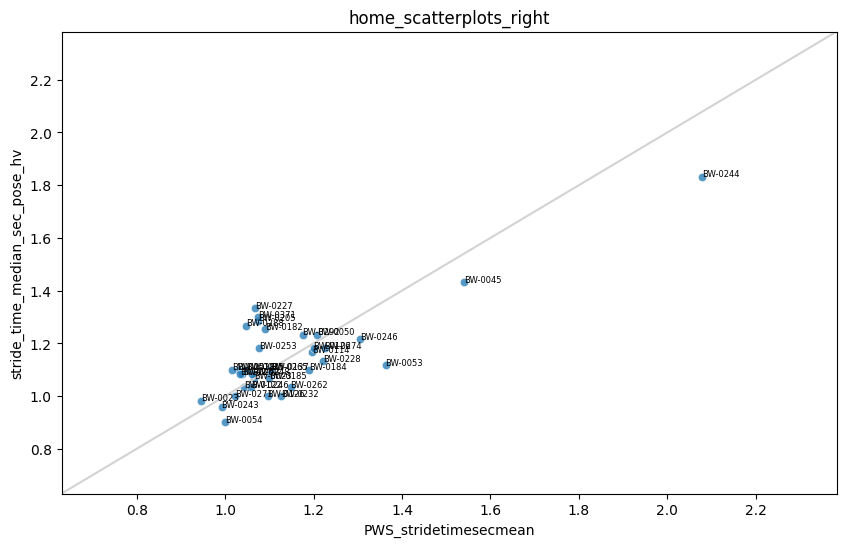

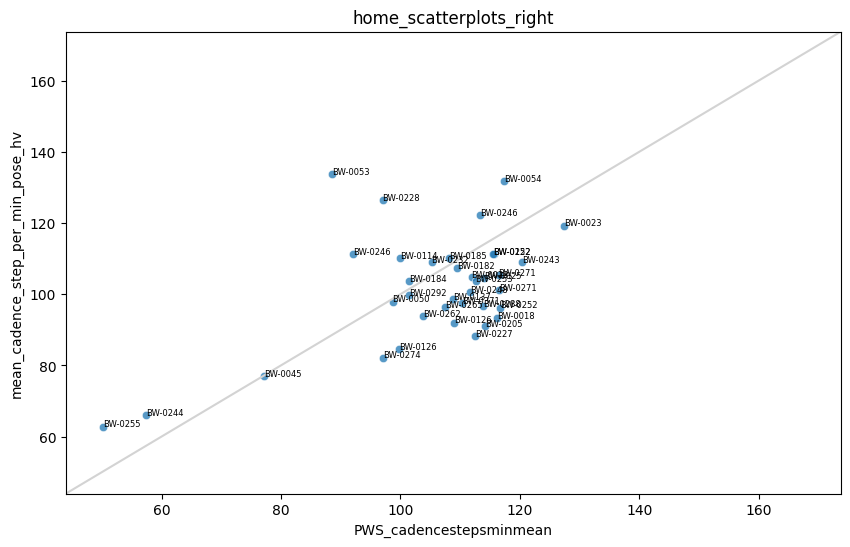

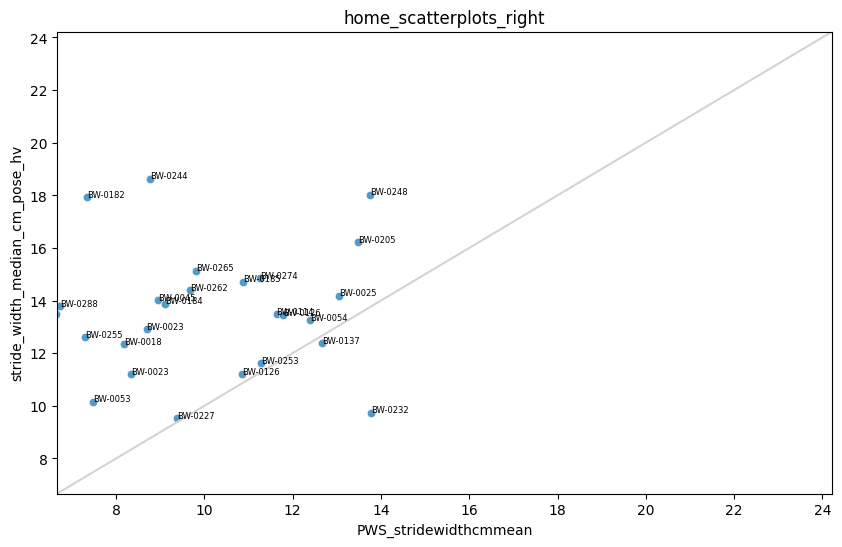

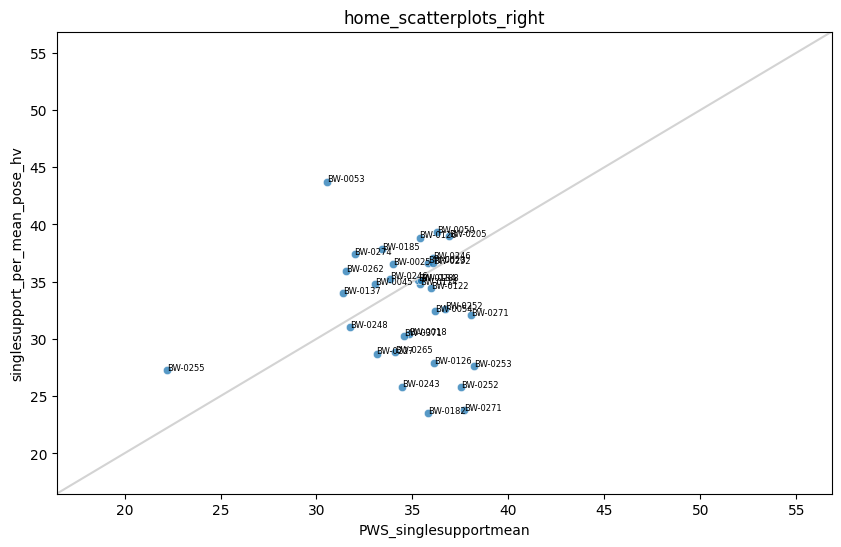

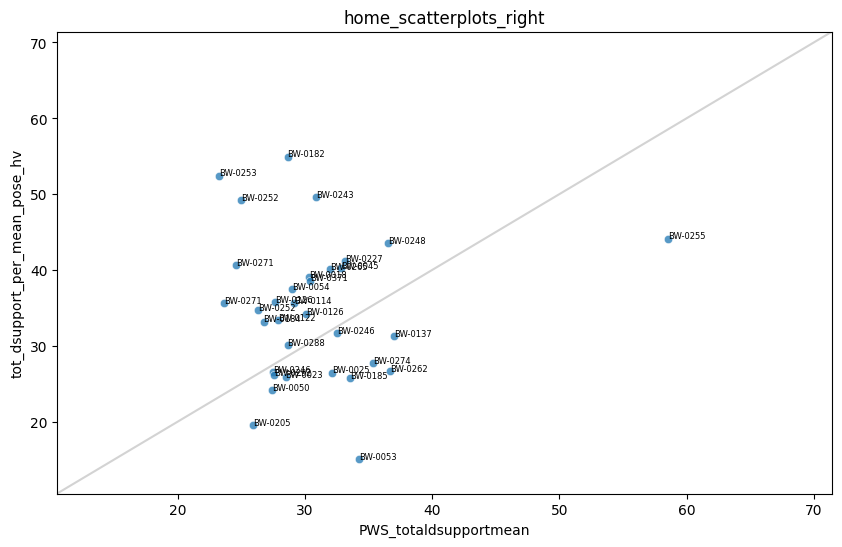

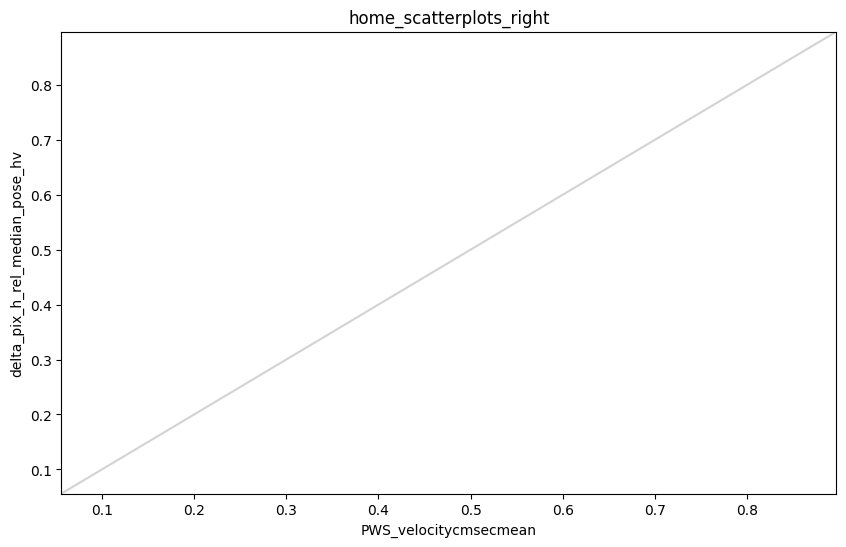

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.59    0.000       37  
1  0.29    0.086       37  
2  0.27    0.104       37  
3 -0.16    0.366       33  
4 -0.05    0.797       33  
5  0.48    0.003       37

In [67]:
# right turning only 
hv_bw_clean_df_right = hv_bw_clean_df.loc[hv_bw_clean_df['task_pose_hv'] == 'gait_vertical_right']
hv_bw_clean_df_right['task_pose_hv'].value_counts()

# correlation results 
hv_corr_results_df_right = metric_correlation(df = hv_bw_clean_df_right, 
                                    video_columns = hv_colnames_2, 
                                     bw_columns = bw_pws_colnames_2, 
                                     output_folder_path = corr_out_path, 
                                     subfolder_name = 'home_scatterplots_right')
hv_corr_results_df_right.to_csv(os.path.join(corr_out_path, 'home_spearman_corr_right.csv'))
hv_corr_results_df_right

### Home Videos Left only 

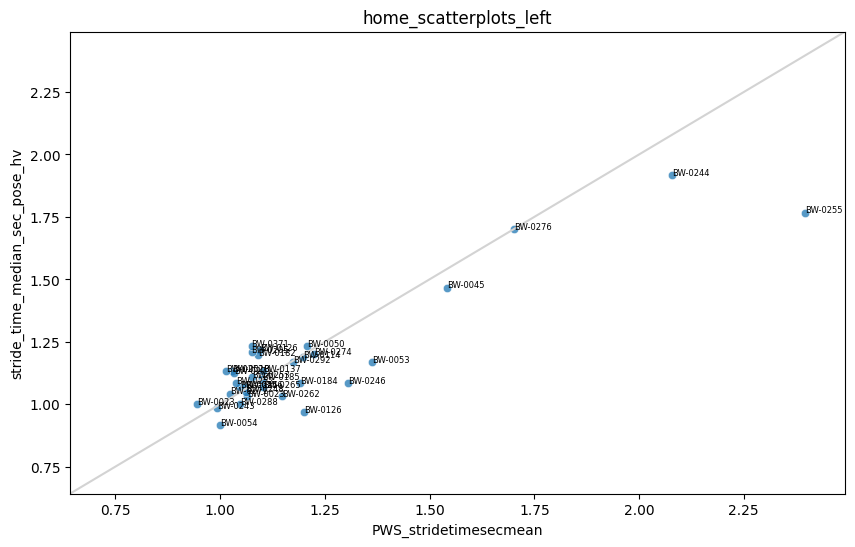

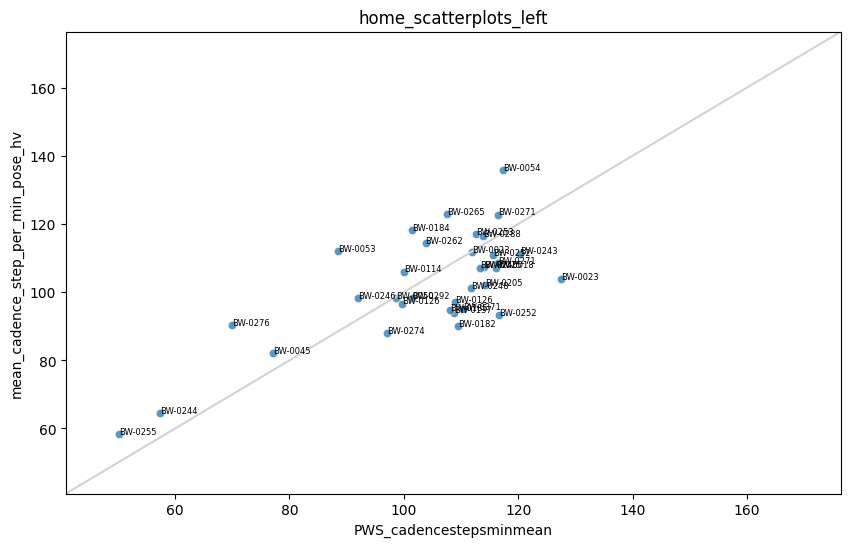

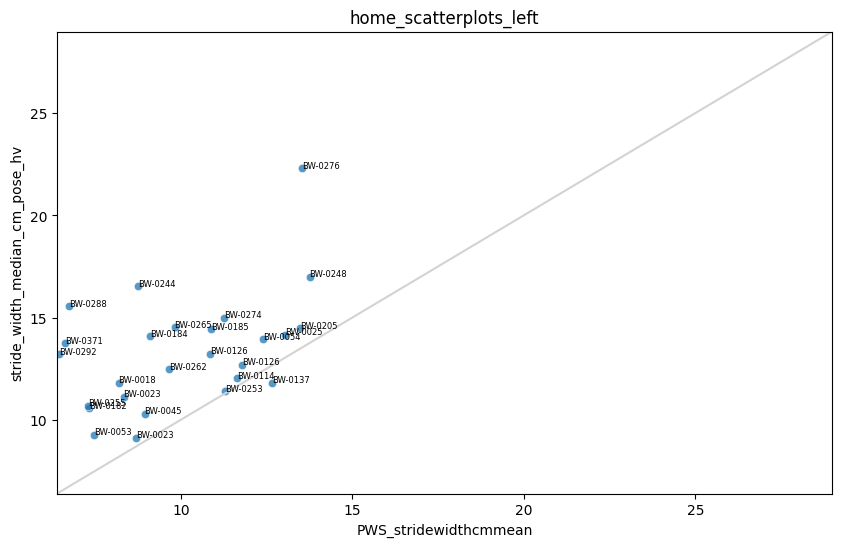

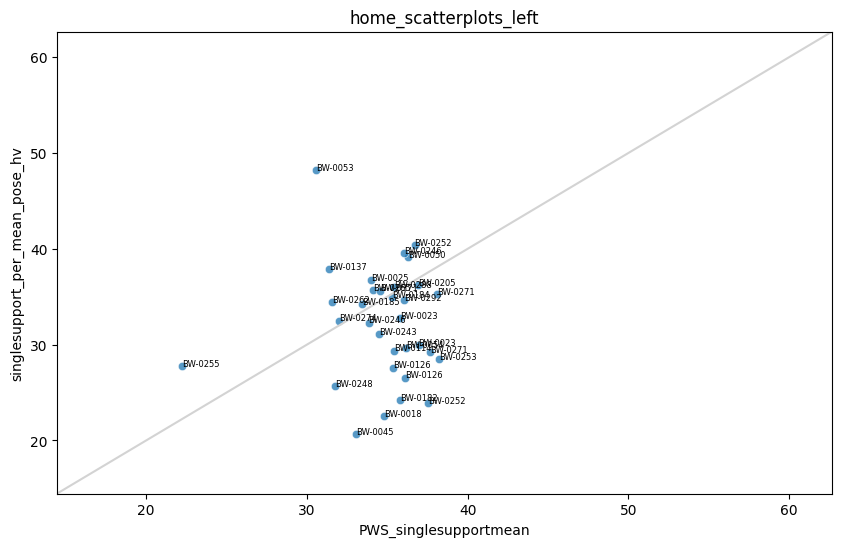

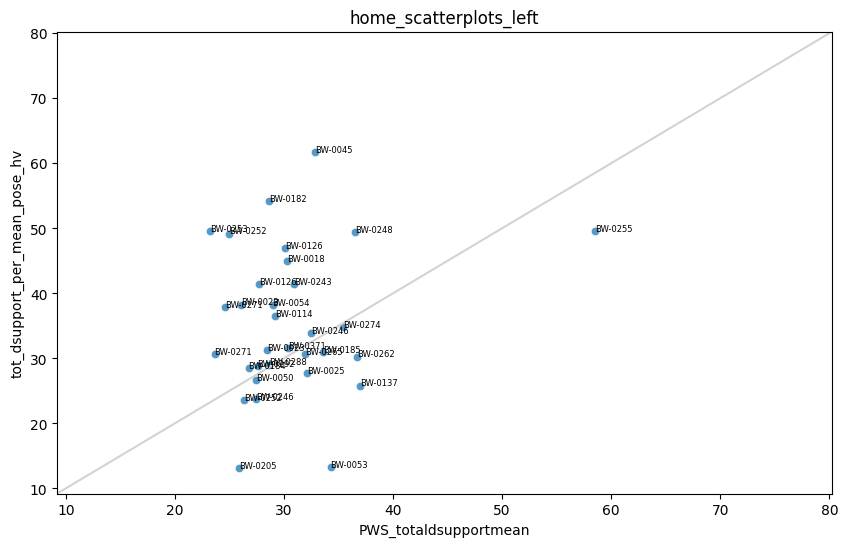

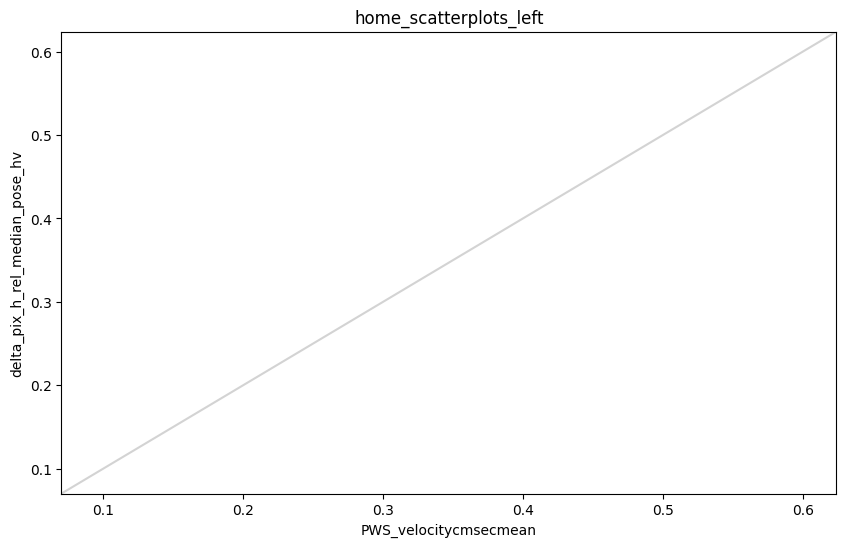

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.61    0.000       34  
1  0.50    0.003       34  
2  0.46    0.007       34  
3 -0.04    0.820       32  
4  0.08    0.675       32  
5  0.59    0.000       34

In [68]:
# left turning all  
hv_bw_clean_df_left = hv_bw_clean_df.loc[hv_bw_clean_df['task_pose_hv'] == 'gait_vertical_left']
hv_bw_clean_df_left['task_pose_hv'].value_counts()

# correlation results 
hv_corr_results_df_right = metric_correlation(df = hv_bw_clean_df_left, 
                                    video_columns = hv_colnames_2, 
                                     bw_columns = bw_pws_colnames_2, 
                                     output_folder_path = corr_out_path, 
                                     subfolder_name = 'home_scatterplots_left')
hv_corr_results_df_right.to_csv(os.path.join(corr_out_path, 'home_spearman_corr_left.csv'))
hv_corr_results_df_right


### Home videos average R + L 

In [69]:
# 1 video per participant 
# only videos with n walking segments >0
# if left and right vidoe with walking segment n 0 --> mean of left and right 
# if either just left or right, exclude 

# group by visit id (date and bw_ID), then average right and left if both are present 
averaged_home_df = (
    hv_bw_clean_df
    .groupby('id_date_pose_hv')[hv_colnames_2]
    .mean()
    .reset_index()
)

task_counts = hv_bw_clean_df.groupby('id_date_pose_hv')['task_pose_hv'].nunique().reset_index(name='task_count')

# Merge to add number of videos - 2 if right and left and 1 if single video
result_df = averaged_home_df.merge(task_counts, on='id_date_pose_hv')

# Merge average with Zeno data
bw_mat_cols = bw_pws_colnames_2 + ['id_date_pose_hv', 'bw_id']
print(bw_mat_cols)
#bw_mat_cols.append('id_date_pose_hv') 
bw_mat_df = hv_bw_clean_df[bw_mat_cols] # select PWS columns and id_date_pose_hv
bw_mat_df = bw_mat_df.drop_duplicates(subset=['id_date_pose_hv'], keep='last')
averaged_home_w_bw_df = result_df.merge(bw_mat_df, on = 'id_date_pose_hv')

['PWS_stridetimesecmean', 'PWS_cadencestepsminmean', 'PWS_stridewidthcmmean', 'PWS_singlesupportmean', 'PWS_totaldsupportmean', 'PWS_velocitycmsecmean', 'id_date_pose_hv', 'bw_id']


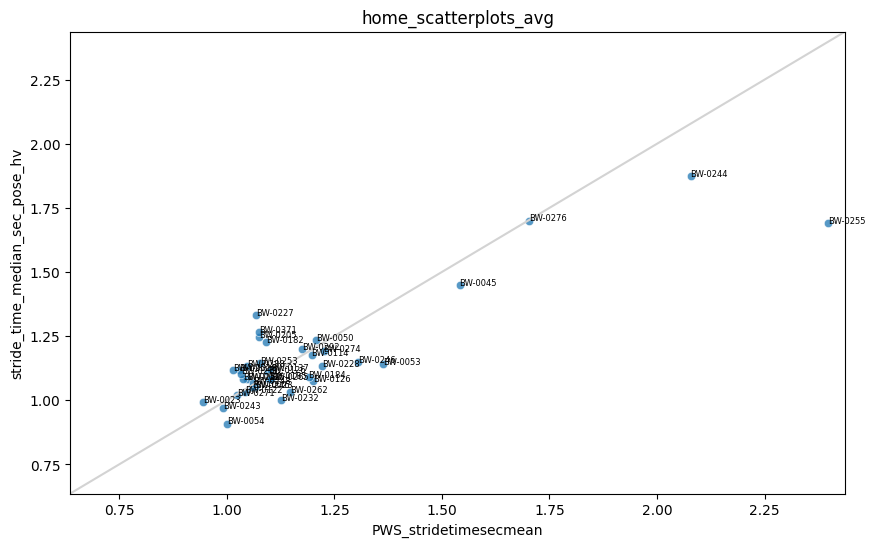

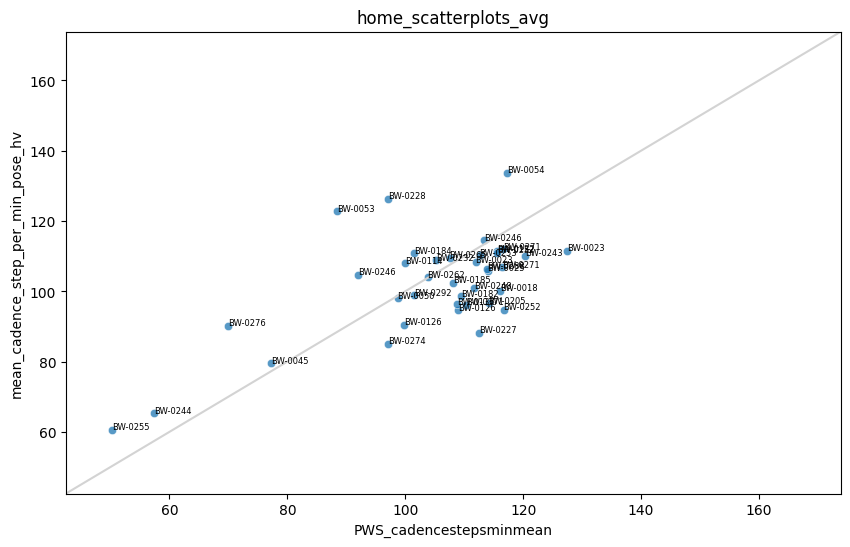

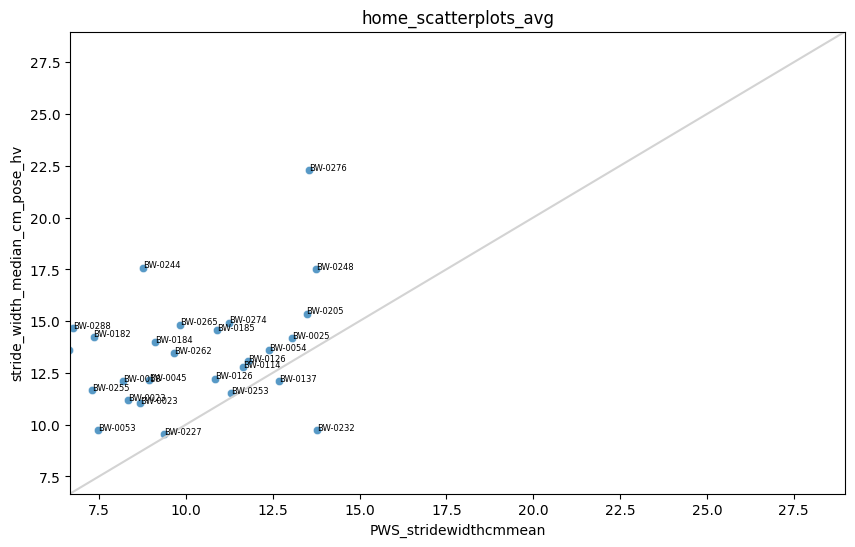

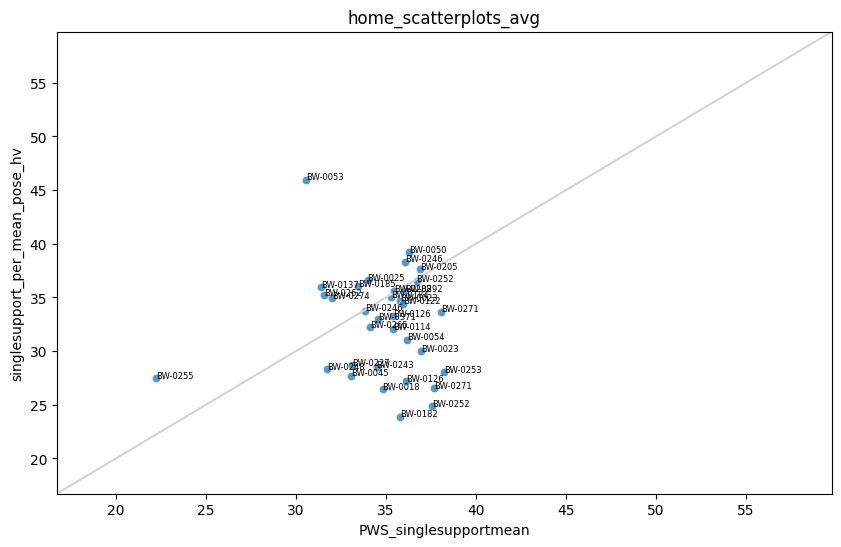

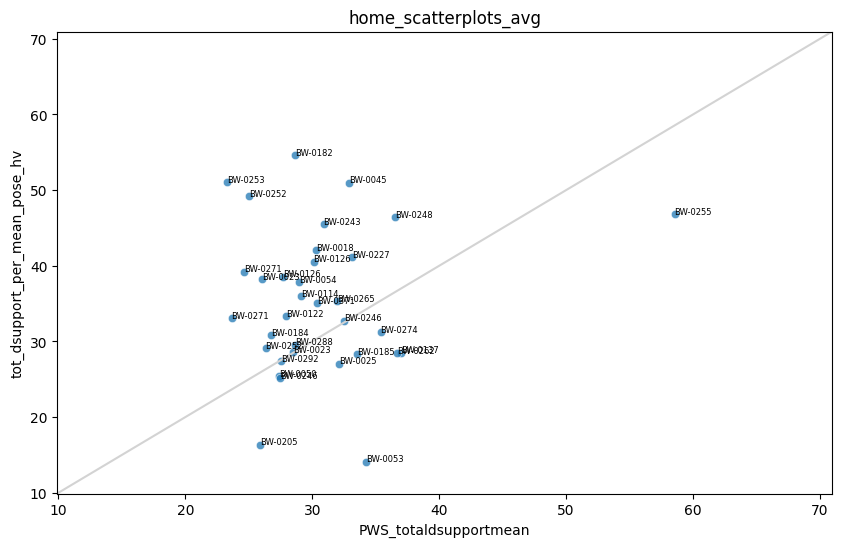

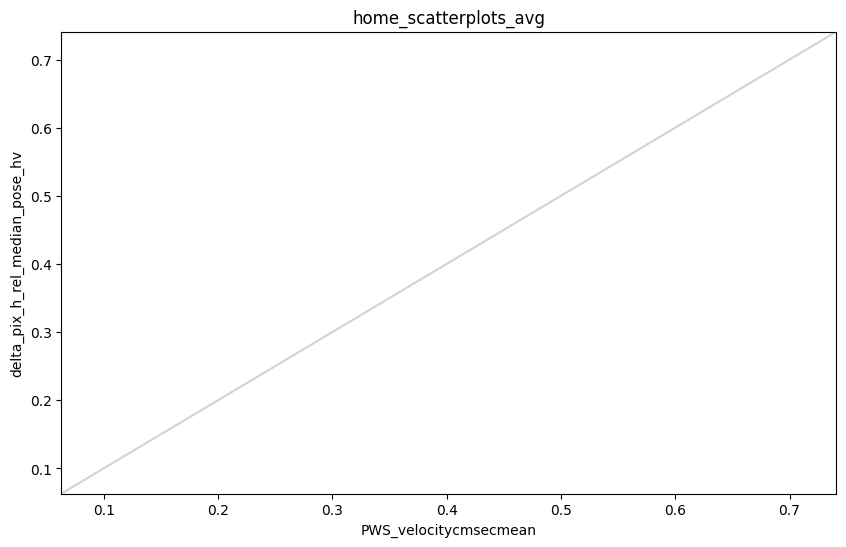

bw_column                       video_column corr_method  \
0    PWS_stridetimesecmean     stride_time_median_sec_pose_hv    spearman   
1  PWS_cadencestepsminmean  mean_cadence_step_per_min_pose_hv    spearman   
2    PWS_stridewidthcmmean     stride_width_median_cm_pose_hv    spearman   
3    PWS_singlesupportmean     singlesupport_per_mean_pose_hv    spearman   
4    PWS_totaldsupportmean      tot_dsupport_per_mean_pose_hv    spearman   
5    PWS_velocitycmsecmean     delta_pix_h_rel_median_pose_hv    spearman   

     rs  p_value  n_pairs  
0  0.63    0.000       38  
1  0.43    0.007       38  
2  0.36    0.027       38  
3 -0.11    0.524       34  
4 -0.01    0.934       34  
5  0.57    0.000       39

In [70]:
# correlation results 
hv_corr_results_df_avg= metric_correlation(df = averaged_home_w_bw_df, 
                                    video_columns = hv_colnames_2, 
                                     bw_columns = bw_pws_colnames_2, 
                                     output_folder_path = corr_out_path, 
                                     subfolder_name = 'home_scatterplots_avg')
hv_corr_results_df_avg.to_csv(os.path.join(corr_out_path, 'home_spearman_corr_avg.csv'))
hv_corr_results_df_avg

# Mean Absolute Error - compare metrics from two data sources 

In [24]:
def calculate_metric_mean_error(df, video_columns, bw_columns, units, output_folder_path, subfolder_name):
    
    if not os.path.exists(os.path.join(output_folder_path, subfolder_name)):
        os.makedirs(os.path.join(output_folder_path, subfolder_name)) 
        
    mean_error_all = [] 

    for metric_i, current_metric in enumerate(video_columns): 
        current_vid_col = video_columns[metric_i]
        current_bw_col = bw_columns[metric_i]
        current_unit = units[metric_i]

        # Drop rows with NaN values in either column 
        clean_df = df.dropna(subset=[current_vid_col, current_bw_col])

        # mean and absolute mean diff 
        current_metric_diff = clean_df[current_vid_col] - clean_df[current_bw_col] 
        current_mean_diff = current_metric_diff.mean()
        current_abs_mean_diff = abs(current_metric_diff).mean()

        # calculate mean ground truth data 
        bw_mean = clean_df[current_bw_col].mean()
        mean_err_per = (current_mean_diff / bw_mean) * 100 
        mae_per = (current_abs_mean_diff / bw_mean) * 100 

        # 95% limits of agreement 
        current_diff_std = current_metric_diff.std()
        upper_limit = round(current_mean_diff + (1.96 * current_diff_std), 2)
        lower_limit = round(current_mean_diff - (1.96 * current_diff_std), 2)

        # plot 
        fig, ax1 = plt.subplots(figsize=(10, 6))
        sns.boxplot(y=current_metric_diff, ax=ax1, fill = False, dodge = True, fliersize = 0)
        sns.stripplot(y = current_metric_diff, ax = ax1, color = 'black', dodge = True)
        fig.suptitle(subfolder_name)
        ax1.set_title(current_vid_col + ' - ' + current_bw_col)
        # center plot at zero
        ymin, ymax = plt.ylim()
        plt.ylim(min(ymin, -ymax), max(ymax, -ymin))
        plt.ylabel(current_unit)
        # add line at zero
        plt.axhline(y=0, color='grey', linestyle='--')
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder_path, 
                                 subfolder_name,
                                 str(current_vid_col + '_vs_' + current_bw_col + '_diff_box.png')))
        plt.close()

        # mean difference 
        mean_error_all.append({'bw_column': current_bw_col, 
                               'video_column': current_vid_col,
                               'n_pairs' : len(clean_df), 
                               'bw_metric_mean' : bw_mean,
                               'mean_error': current_mean_diff, 
                               'mean_abs_error' : current_abs_mean_diff, 
                               'mean_err_and_mean_abs_err' : f"{current_mean_diff:.2f}, {current_abs_mean_diff:.2f}",
                               'mean_error_%_of_mean' : mean_err_per,
                               'mae_%_of_mean' : mae_per, 
                               'upper_limit' : upper_limit, 
                                'lower_limit' : lower_limit, 
                              'limits_of_agreement' : f"{lower_limit}; {upper_limit}"
                              })

    
     # Create DataFrame with results
    mean_error_df = pd.DataFrame(mean_error_all)
    mean_error_df = mean_error_df.round(2)
    
    return mean_error_df

In [25]:
# set mean error output folder 
mae_out_path = os.path.join(out_path, 'mean_error')
print(mae_out_path)

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis\007\002_video_vs_mat_metrics_V2\mean_error


## PWS 

### PWS - any video metric is calculated in, regardless if other metrics were calculated successfully 

In [26]:
# PWS 
zv_pws_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_clean_df, 
                                                    video_columns = zv_colnames, 
                                                    bw_columns = bw_pws_colnames, 
                                                    units = units, 
                                                    output_folder_path = mae_out_path, 
                                                    subfolder_name = 'zeno_pws_boxplots')
zv_pws_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_errors.csv'))

### PWS - multiple people YN 

In [27]:
# PWS - videos with multiple people in frame 

# filter df 
zv_pws_bw_MultPpl_Y_df = zv_pws_bw_clean_df.loc[zv_pws_bw_clean_df['multiple_people_YN'] == 'Y'] 
print(f"length Y df: {len(zv_pws_bw_MultPpl_Y_df)}") 
print(zv_pws_bw_MultPpl_Y_df['multiple_people_YN'].value_counts())

# calculate mean errors 
zv_pws_MultPpl_Y_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_MultPpl_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_MultPpl_Y_boxplots')

zv_pws_MultPpl_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_MultPpl_Y_errors.csv'))

length Y df: 50
multiple_people_YN
Y    50
Name: count, dtype: int64


In [28]:
# PWS - videos with only participant in the frame 

# filter df 
zv_pws_bw_MultPpl_N_df = zv_pws_bw_clean_df.loc[zv_pws_bw_clean_df['multiple_people_YN'] == 'N'] 
print(f"length N df: {len(zv_pws_bw_MultPpl_N_df)}") 
print(zv_pws_bw_MultPpl_N_df['multiple_people_YN'].value_counts())

# calculate mean errors 
zv_pws_MultPpl_N_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_MultPpl_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_MultPpl_N_boxplots')

zv_pws_MultPpl_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_MultPpl_N_errors.csv'))

length N df: 182
multiple_people_YN
N    182
Name: count, dtype: int64


### PWS Multiple people - (None or part of body in part of video) vs (multiple person in video)  

In [29]:
# PWS - videos with other person in frame 

# filter df 
zv_pws_bw_MultPpl3_Y_df = zv_pws_bw_clean_df.loc[(zv_pws_bw_clean_df['multiple_people_3'] == 'Group_1')] 
print(f"length Y df: {len(zv_pws_bw_MultPpl3_Y_df)}") 
print(zv_pws_bw_MultPpl3_Y_df['multiple_people_3'].value_counts())

# calculate mean errors 
zv_pws_MultPpl3_Y_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_MultPpl3_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_MultPpl3_Y_boxplots')

zv_pws_MultPpl3_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_MultPpl3_Y_errors.csv'))

length Y df: 38
multiple_people_3
Group_1    38
Name: count, dtype: int64


In [30]:
# PWS - videos with no one else in frame or only part of body in part of frame 

# filter df 
zv_pws_bw_MultPpl3_N_df = zv_pws_bw_clean_df.loc[(zv_pws_bw_clean_df['multiple_people_3'] == 'N') | (zv_pws_bw_clean_df['multiple_people_3'] == 'Group_2')] 
print(f"length N df: {len(zv_pws_bw_MultPpl3_N_df)}") 
print(zv_pws_bw_MultPpl3_N_df['multiple_people_3'].value_counts())

# calculate mean errors 
zv_pws_MultPpl3_N_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_MultPpl3_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_MultPpl3_N_boxplots')

zv_pws_MultPpl3_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_MultPpl3_N_errors.csv'))

length N df: 194
multiple_people_3
N          182
Group_2     12
Name: count, dtype: int64


### PWS Assistive Device Yes No 

In [31]:
# filter df 
zv_pws_bw_AD_Y_df = zv_pws_bw_clean_df.loc[zv_pws_bw_clean_df['assistive_device_YN'] == 'Y'] 
print(f"length Y df: {len(zv_pws_bw_AD_Y_df)}") 
print(zv_pws_bw_AD_Y_df['assistive_device_YN'].value_counts())

# calculate mean errors 
zv_pws_AD_Y_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_AD_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_AD_Y_boxplots')

zv_pws_AD_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_AD_Y_errors.csv'))

length Y df: 24
assistive_device_YN
Y    24
Name: count, dtype: int64


In [32]:
# filter df 
zv_pws_bw_AD_N_df = zv_pws_bw_clean_df.loc[zv_pws_bw_clean_df['assistive_device_YN'] == 'N'] 
print(f"length N df: {len(zv_pws_bw_AD_N_df)}") 
print(zv_pws_bw_AD_N_df['assistive_device_YN'].value_counts())

# calculate mean errors 
zv_pws_AD_N_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_AD_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_AD_N_boxplots')

zv_pws_AD_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_AD_N_errors.csv'))

length N df: 208
assistive_device_YN
N    208
Name: count, dtype: int64


### PWS - (AD or multiple people) vs (no AD and no multiple people) 

In [33]:
zv_pws_bw_AD_MultPpl_Y_df = zv_pws_bw_clean_df.loc[(zv_pws_bw_clean_df['assistive_device_YN'] == 'Y') | 
                                                   (zv_pws_bw_clean_df['multiple_people_3'] == 'Group_1')]
print(f"length Y df: {len(zv_pws_bw_AD_MultPpl_Y_df)}") 

# calculate mean errors 
zv_pws_AD_MultPpl_Y_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_AD_MultPpl_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_AD_MultPpl_Y_boxplots')

zv_pws_AD_MultPpl_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_AD_MultPpl_Y_errors.csv'))

length Y df: 49


In [34]:
zv_pws_bw_AD_MultPpl_N_df = zv_pws_bw_clean_df.loc[(zv_pws_bw_clean_df['assistive_device_YN'] == 'N') & 
                                                   ((zv_pws_bw_clean_df['multiple_people_3'] == 'Group_2') |
                                                    (zv_pws_bw_clean_df['multiple_people_3'] == 'N'))]
print(f"length N df: {len(zv_pws_bw_AD_MultPpl_N_df)}") 

# calculate mean errors 
zv_pws_AD_MultPpl_N_mae_results_df = calculate_metric_mean_error(df = zv_pws_bw_AD_MultPpl_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_pws_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_pws_AD_MultPpl_N_boxplots')

zv_pws_AD_MultPpl_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_pws_AD_MultPpl_N_errors.csv'))

length N df: 183


## FW 

### FW - any video metric is calculated in, regardless if other metrics were calculated successfully 

In [35]:
# FW 
zv_fw_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_clean_df, 
                                                    video_columns = zv_colnames, 
                                                    bw_columns = bw_fw_colnames, 
                                                    units = units, 
                                                    output_folder_path = mae_out_path, 
                                                    subfolder_name = 'zeno_fw_boxplots')
zv_fw_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_errors.csv'))

### FW - multiple people YN 

In [36]:
# FW - videos with multiple people in frame 

# filter df 
zv_fw_bw_MultPpl_Y_df = zv_fw_bw_clean_df.loc[zv_fw_bw_clean_df['multiple_people_YN'] == 'Y'] 
print(f"length Y df: {len(zv_fw_bw_MultPpl_Y_df)}") 
print(zv_fw_bw_MultPpl_Y_df['multiple_people_YN'].value_counts())

# calculate mean errors 
zv_fw_MultPpl_Y_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_MultPpl_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_MultPpl_Y_boxplots')

zv_fw_MultPpl_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_MultPpl_Y_errors.csv'))

length Y df: 62
multiple_people_YN
Y    62
Name: count, dtype: int64


In [37]:
# FW - videos with only participant in the frame 

# filter df 
zv_fw_bw_MultPpl_N_df = zv_fw_bw_clean_df.loc[zv_fw_bw_clean_df['multiple_people_YN'] == 'N'] 
print(f"length N df: {len(zv_fw_bw_MultPpl_N_df)}") 
print(zv_fw_bw_MultPpl_N_df['multiple_people_YN'].value_counts())

# calculate mean errors 
zv_fw_MultPpl_N_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_MultPpl_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_MultPpl_N_boxplots')

zv_fw_MultPpl_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_MultPpl_N_errors.csv'))

length N df: 169
multiple_people_YN
N    169
Name: count, dtype: int64


### FW Multiple people - (None or part of body in part of video) vs (multiple person in video)  

In [38]:
# FW - videos with other person in frame 

# filter df 
zv_fw_bw_MultPpl3_Y_df = zv_fw_bw_clean_df.loc[(zv_fw_bw_clean_df['multiple_people_3'] == 'Group_1')] 
print(f"length Y df: {len(zv_fw_bw_MultPpl3_Y_df)}") 
print(zv_fw_bw_MultPpl3_Y_df['multiple_people_3'].value_counts())

# calculate mean errors 
zv_fw_MultPpl3_Y_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_MultPpl3_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_MultPpl3_Y_boxplots')

zv_fw_MultPpl3_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_MultPpl3_Y_errors.csv'))

length Y df: 51
multiple_people_3
Group_1    51
Name: count, dtype: int64


In [39]:
# FW - videos with no one else in frame or only part of body in part of frame 

# filter df 
zv_fw_bw_MultPpl3_N_df = zv_fw_bw_clean_df.loc[(zv_fw_bw_clean_df['multiple_people_3'] == 'N') | (zv_fw_bw_clean_df['multiple_people_3'] == 'Group_2')] 
print(f"length N df: {len(zv_fw_bw_MultPpl3_N_df)}") 
print(zv_fw_bw_MultPpl3_N_df['multiple_people_3'].value_counts())

# calculate mean errors 
zv_fw_MultPpl3_N_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_MultPpl3_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_MultPpl3_N_boxplots')

zv_fw_MultPpl3_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_MultPpl3_N_errors.csv'))

length N df: 180
multiple_people_3
N          169
Group_2     11
Name: count, dtype: int64


### FW Assistive Device Yes No 

In [40]:
# filter df 
zv_fw_bw_AD_Y_df = zv_fw_bw_clean_df.loc[zv_fw_bw_clean_df['assistive_device_YN'] == 'Y'] 
print(f"length Y df: {len(zv_fw_bw_AD_Y_df)}") 
print(zv_fw_bw_AD_Y_df['assistive_device_YN'].value_counts())

# calculate mean errors 
zv_fw_AD_Y_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_AD_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_AD_Y_boxplots')

zv_fw_AD_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_AD_Y_errors.csv'))

length Y df: 22
assistive_device_YN
Y    22
Name: count, dtype: int64


In [41]:
# filter df 
zv_fw_bw_AD_N_df = zv_fw_bw_clean_df.loc[zv_fw_bw_clean_df['assistive_device_YN'] == 'N'] 
print(f"length N df: {len(zv_fw_bw_AD_N_df)}") 
print(zv_fw_bw_AD_N_df['assistive_device_YN'].value_counts())

# calculate mean errors 
zv_fw_AD_N_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_AD_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_AD_N_boxplots')

zv_fw_AD_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_AD_N_errors.csv'))

length N df: 209
assistive_device_YN
N    209
Name: count, dtype: int64


### FW - (AD or multiple people) vs (no AD and no multiple people)

In [42]:
zv_fw_bw_AD_MultPpl_Y_df = zv_fw_bw_clean_df.loc[(zv_fw_bw_clean_df['assistive_device_YN'] == 'Y') | 
                                                   (zv_fw_bw_clean_df['multiple_people_3'] == 'Group_1')]
print(f"length Y df: {len(zv_fw_bw_AD_MultPpl_Y_df)}") 

# calculate mean errors 
zv_fw_AD_MultPpl_Y_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_AD_MultPpl_Y_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_AD_MultPpl_Y_boxplots')

zv_fw_AD_MultPpl_Y_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_AD_MultPpl_Y_errors.csv'))

length Y df: 59


In [43]:
zv_fw_bw_AD_MultPpl_N_df = zv_fw_bw_clean_df.loc[(zv_fw_bw_clean_df['assistive_device_YN'] == 'N') & 
                                                   ((zv_fw_bw_clean_df['multiple_people_3'] == 'Group_2') |
                                                    (zv_fw_bw_clean_df['multiple_people_3'] == 'N'))]
print(f"length N df: {len(zv_fw_bw_AD_MultPpl_N_df)}") 

# calculate mean errors 
zv_fw_AD_MultPpl_N_mae_results_df = calculate_metric_mean_error(df = zv_fw_bw_AD_MultPpl_N_df, 
                                                              video_columns = zv_colnames, 
                                                              bw_columns = bw_fw_colnames, 
                                                              units = units, 
                                                              output_folder_path = mae_out_path, 
                                                              subfolder_name = 'zeno_fw_AD_MultPpl_N_boxplots')

zv_fw_AD_MultPpl_N_mae_results_df.to_csv(os.path.join(mae_out_path, 'zeno_fw_AD_MultPpl_N_errors.csv'))

length N df: 172


## Home videos 

In [44]:
# Home Videos  
# hv_mae_results_df = calculate_metric_mean_error(df = hv_bw_clean_df, 
                                                #     video_columns = hv_colnames, 
                                                #     bw_columns = bw_pws_colnames, 
                                                #     units = units, 
                                                #     output_folder_path = mae_out_path, 
                                                #     subfolder_name = 'home_boxplots')
# hv_mae_results_df.to_csv(os.path.join(mae_out_path, 'home_errors.csv'))

# Bland Altman Plots 

In [48]:
def bland_altman_plot(df, video_columns, bw_columns, col_color_key, units, output_folder_path, subfolder_name):
    
    if not os.path.exists(os.path.join(output_folder_path, subfolder_name)):
        os.makedirs(os.path.join(output_folder_path, subfolder_name)) 

    for metric_i, current_metric in enumerate(video_columns): 
        current_bw_col = bw_columns[metric_i]
        current_vid_col = video_columns[metric_i]
        current_unit = current_unit = units[metric_i]

        clean_df = df.dropna(subset=[current_vid_col, current_bw_col])
    
        # Compute the mean and the difference
        mean_measurements = (clean_df[current_bw_col] + clean_df[current_vid_col]) / 2
        diff_measurements = clean_df[current_vid_col] - clean_df[current_bw_col]   # Difference between measurements

        # Mean difference and standard deviation of the difference
        mean_diff = round(diff_measurements.mean(), 2)
        std_diff = diff_measurements.std()

        # 95% limits of agreement 
        upper_limit = round(mean_diff + 1.96 * std_diff, 2)
        lower_limit = round(mean_diff - 1.96 * std_diff, 2)
        limits_of_agreement = f"{lower_limit}; {upper_limit}"
        
        # Plot the data
        plt.figure(figsize=(3.25, 3), layout = 'tight')

        # color points by col_color_key var 
        if col_color_key == 'clean_EDSS':
            color_label = 'EDSS'
        elif col_color_key == 'clean_T25FW_Avg':
            color_label = 'T25FW' 
        elif col_color_key == 'PWS_velocitycmsecmean':
            color_label = 'PWS Velocity'
        elif col_color_key == 'FW_velocitycmsecmean':
            color_label = 'FW Velocity'
        elif col_color_key == 'blinds':
            color_label = 'Blinds' 
        elif col_color_key == 'multiple_people_YN':
            color_label = 'Multiple Ppl' 
        elif col_color_key == 'multiple_people_3': 
            color_label = 'Multiple Ppl'
        elif col_color_key == 'assistive_device_YN': 
            color_label = 'Assistive Device' 
        else: 
            color_label = col_color_key

        # continuous 
        cont_colors = ['clean_T25FW_Avg', 
                       'clean_EDSS', 
                       'PWS_velocitycmsecmean', 
                       'FW_velocitycmsecmean'] 
                       
        if col_color_key in cont_colors: 
            plt.scatter(mean_measurements, diff_measurements, s = 5, alpha = 0.7, c = clean_df[col_color_key])
            #    plt.colorbar(location = 'right', label = color_label, fraction = 0.05)
            cbar = plt.colorbar(location='right', label=color_label, fraction=0.05, shrink=0.8)
            cbar.set_label(color_label, fontsize=8)
            cbar.ax.tick_params(labelsize=7)

        # categorical - color by category 
        else:
            unique_values = ['N', 
                             'Y', 
                             'Group_1', 
                             'Group_2',  
                             'UNK', 
                             'partially_open', 
                            'fully_closed', 
                            'fully_open']
            
            colors = ['tab:gray',
                      'tab:blue', 
                      'tab:orange', 
                      'tab:green', 
                      'tab:red', 
                      'tab:purple', 
                      'tab:brown', 
                      'tab:pink']
            
            cmap_dict = dict(zip(unique_values, colors))

            # convert nan to UNK
            clean_df = clean_df.copy()
            clean_df[col_color_key] = clean_df[col_color_key].where(~clean_df[col_color_key].isna(), 'UNK') 
            # Map each value in clean_df to a color
            color_values = [cmap_dict[val] for val in clean_df[col_color_key]]
            
            # plot 
            plt.scatter(mean_measurements, diff_measurements, s = 5, alpha = 0.7, c = color_values)

            # legend 
            categories = clean_df[col_color_key].unique()
            for cat in categories:
                plt.scatter([], [], s = 5, alpha = 0.7, c=[cmap_dict[cat]], label=cat)
                plt.legend(title=color_label, 
                           bbox_to_anchor=(1.05, 1), 
                           loc='upper left', 
                           fontsize = 6, 
                           title_fontsize=6, )

                plt.tight_layout()
        
        # Add mean difference line and limits of agreement (±1.96*std)
        plt.axhline(mean_diff, color='black', linestyle=':', alpha = 0.5, label=f'Mean diff')
        plt.axhline(upper_limit, color='black', linestyle='--', alpha = 0.5, label=f'+1.96 SD')
        plt.axhline(lower_limit, color='black', linestyle='--', alpha = 0.5, label=f'-1.96 SD')
        plt.axhline(y=0, color='grey', alpha = 0.5, linestyle='-')

        # set axis limits for consistency 
        #print(f"current_vid_col: {current_vid_col}") 
        if 'cadence' in current_vid_col: 
            ymin = -105
            ymax = 105

            xmin = 40
            xmax = 180
            
        elif 'stride_time' in current_vid_col: 
            ymin = -3
            ymax = 3

            xmin = 0.25
            xmax = 3
        elif 'stride_width' in current_vid_col: 
            ymin = -20
            ymax = 20

            xmin = 3
            xmax = 30
    
        elif 'singlesupport' in current_vid_col: 
            ymin = -25
            ymax = 25

            xmin = 10
            xmax = 50
        elif 'tot_dsupport' in current_vid_col: 
            ymin = -115
            ymax = 115

            xmin = 14
            xmax = 140

        plt.ylim(ymin, ymax) 
        plt.xlim(xmin, xmax)
    
        # Labels and title
 #       plt.xlabel('Mean of Zeno Mat vs Video Pose Metric (' + current_unit + ')') 
        plt.xlabel(f'Mean ({current_unit})', fontsize = 9) 
        plt.ylabel('Video - Walkway', fontsize = 9)
  #      plt.ylabel(f'Difference ({current_unit})', fontsize = 9)
        plt.tick_params(axis='both', labelsize=7)  
#        plt.legend(scatterpoints=1, title='', 
#                   loc='best', fontsize = 9)

        # if statment for title 
        if current_bw_col == 'PWS_stridetimesecmean' or current_bw_col == 'FW_stridetimesecmean':
            plot_title = 'Stride Time'
        elif current_bw_col == 'PWS_cadencestepsminmean' or current_bw_col == 'FW_cadencestepsminmean':
            plot_title = 'Cadence'
        elif current_bw_col == 'PWS_stridewidthcmmean' or current_bw_col == 'FW_stridewidthcmmean':
            plot_title = 'Stride Width'
        elif current_bw_col == 'PWS_singlesupportmean' or current_bw_col == 'FW_singlesupportmean': 
            plot_title = 'Single Support' 
        elif current_bw_col == 'PWS_totaldsupportmean' or current_bw_col == 'FW_totaldsupportmean':
            plot_title = 'Double Support' 
        else: 
            plot_title = current_bw_col
        
        plt.title(plot_title, fontsize = 9)
        plt.savefig(os.path.join(output_folder_path, 
                                 subfolder_name,
                                 str(current_vid_col + '_vs_' + current_bw_col + '_blandalt.png')),
                    bbox_inches='tight')
        plt.show()
        plt.close()

In [49]:
# set bland altman output folder 
bland_alt_out_path = os.path.join(out_path, 'bland_altman')
print(bland_alt_out_path)

C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis\007\002_video_vs_mat_metrics_V2\bland_altman


## PWS 

### PWS all videos 

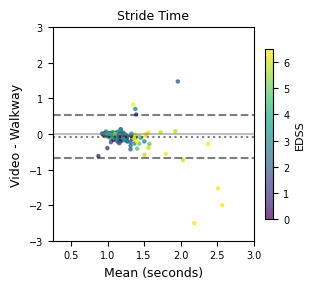

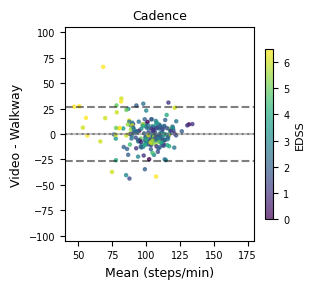

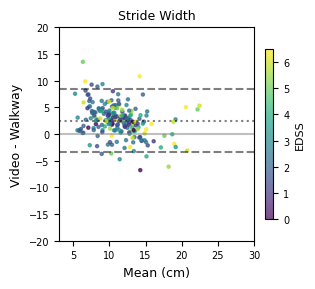

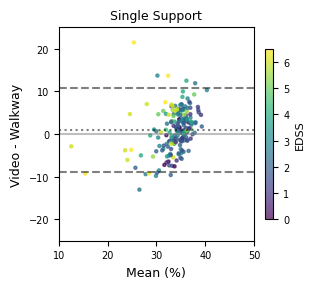

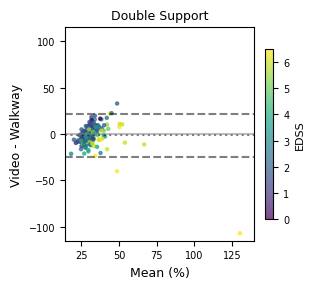

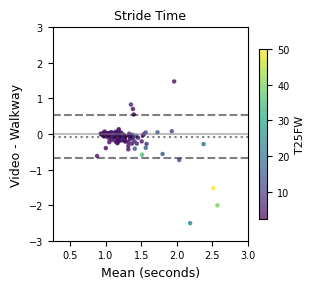

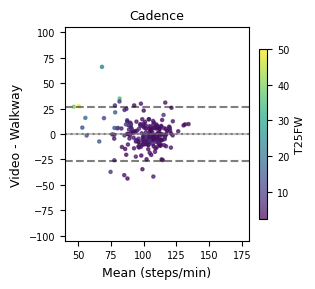

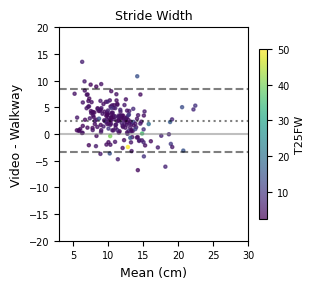

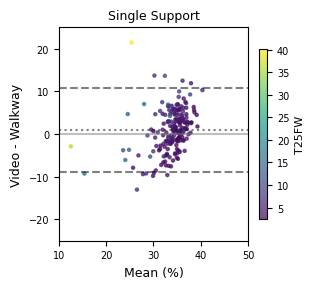

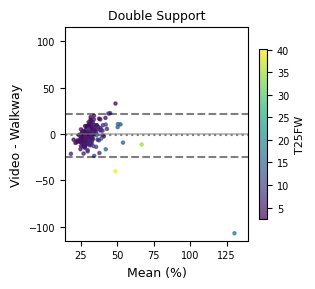

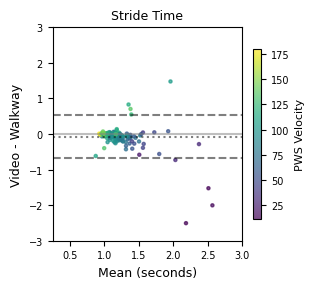

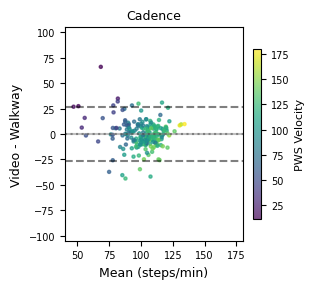

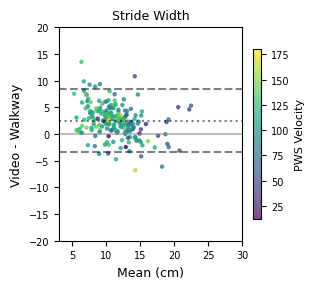

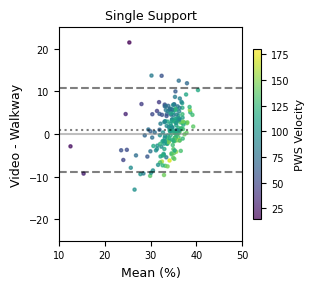

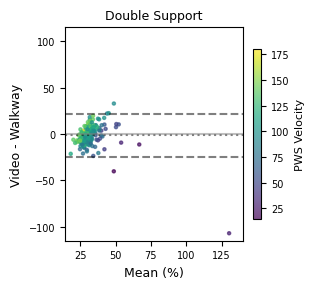

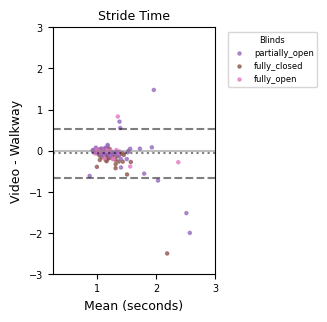

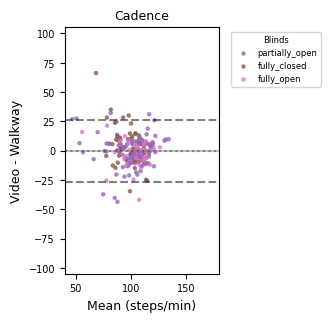

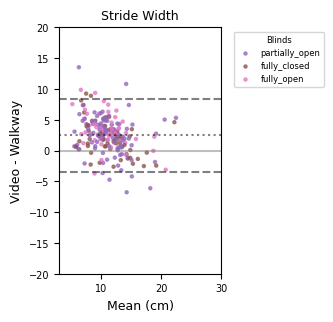

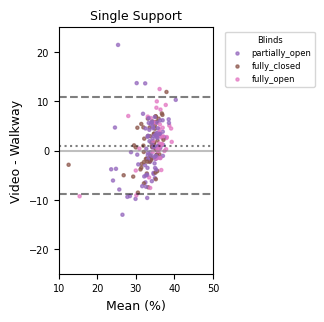

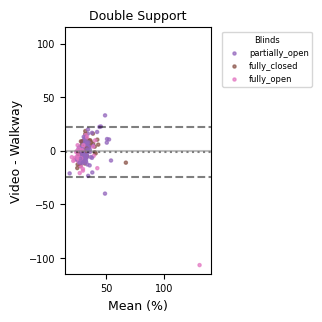

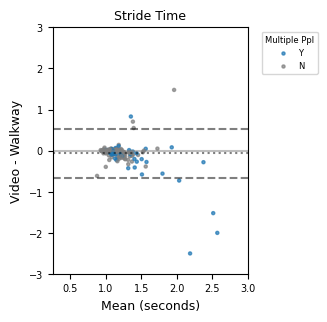

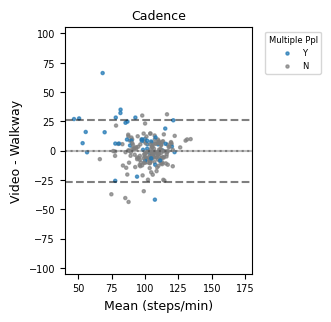

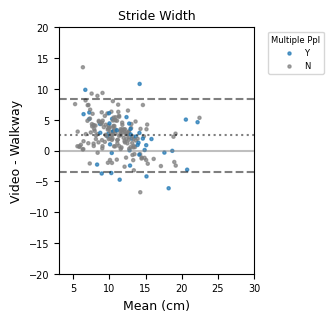

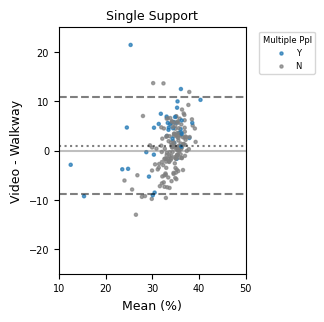

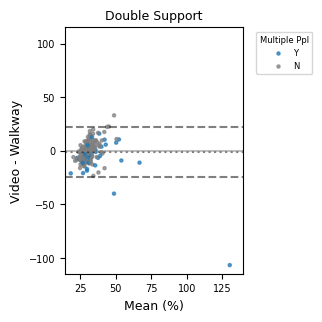

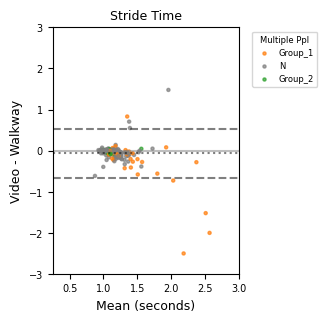

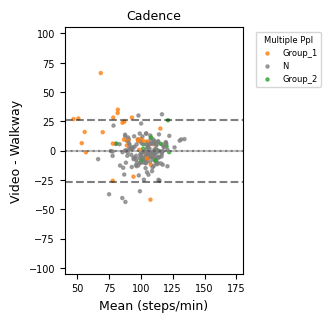

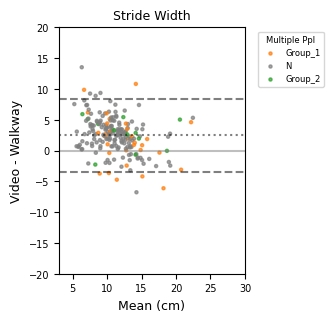

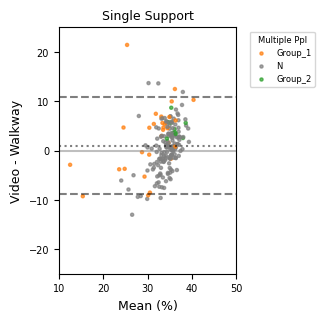

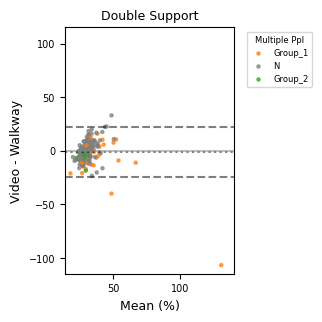

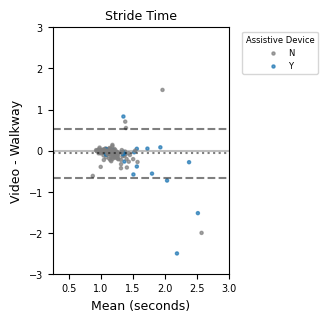

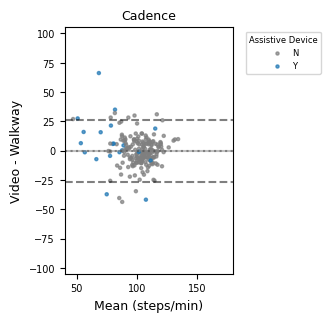

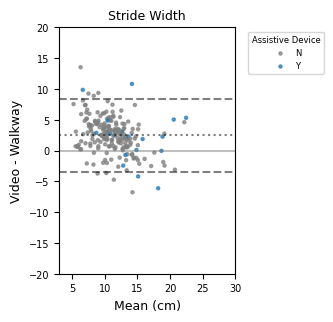

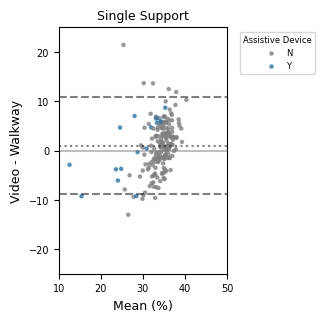

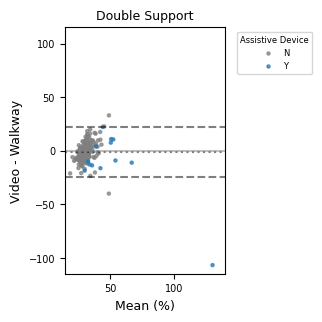

In [50]:
# PWS 
# color by EDSS 
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'clean_EDSS', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_edss')

# color by T25FW 
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'clean_T25FW_Avg', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_t25fw')

# color by that videos velocity from Zeno mat  
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'PWS_velocitycmsecmean', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_pws_vel')

# color by blind positions 
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'blinds', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_blinds')

# color by whether or not multiple people are in video - Yes No
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_multPeople')


# color by whether or not multiple people are in video - Three groups 
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_multPeople3')

# color by use of assistive device  
bland_altman_plot(df = zv_pws_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_all_by_ADs')


### PWS - multiple people YN
Separate BA plots for each group 

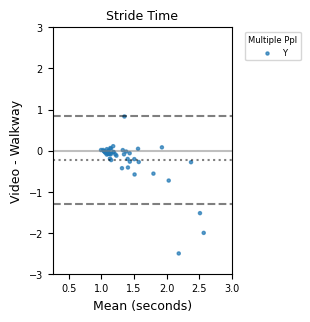

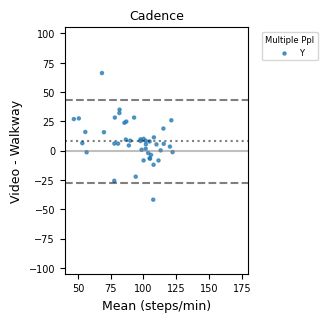

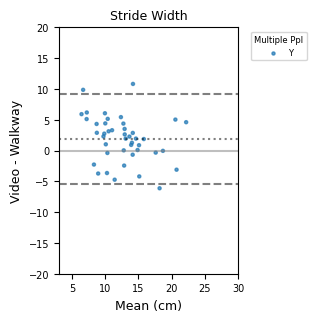

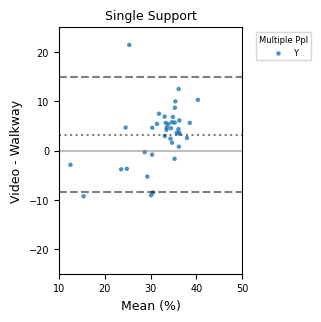

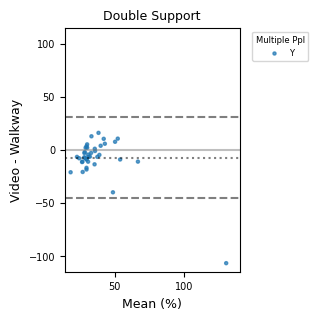

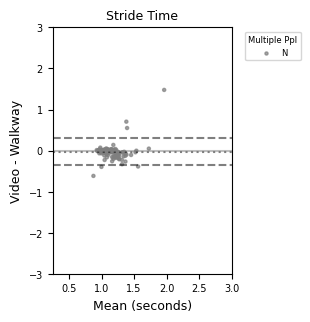

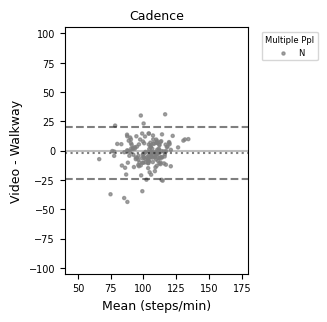

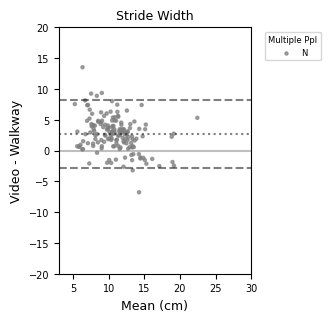

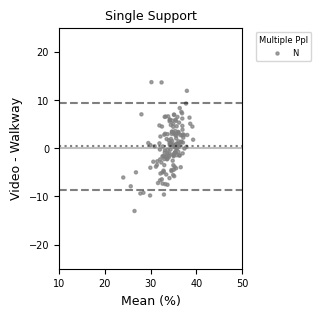

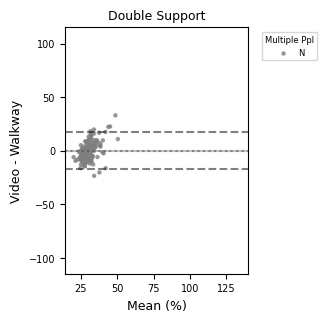

In [51]:
# Plot only videos with multiple people in video  
bland_altman_plot(df = zv_pws_bw_MultPpl_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_MultPpl_Y_by_multPeople')

# Plot only videos without multiple people in video  
bland_altman_plot(df = zv_pws_bw_MultPpl_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_MultPpl_N_by_multPeople')

### PWS Multiple people - (None or part of body in part of video) vs (multiple person in video)

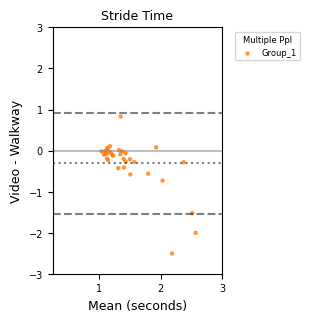

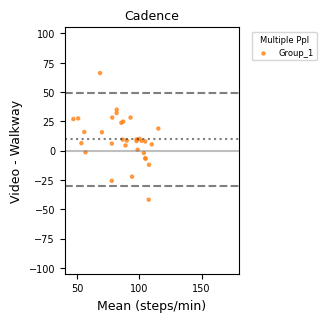

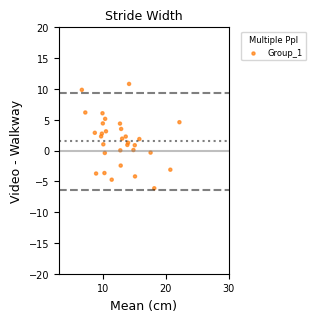

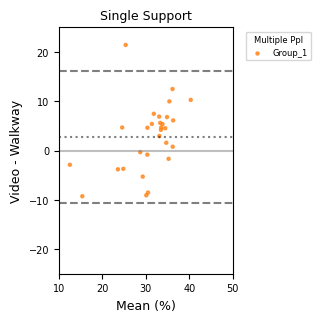

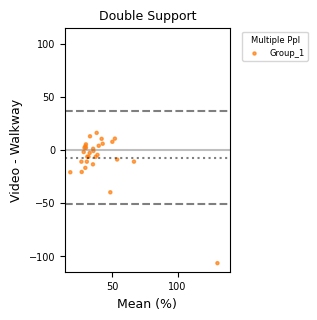

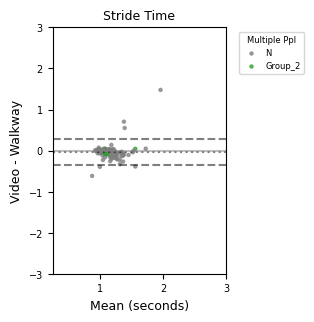

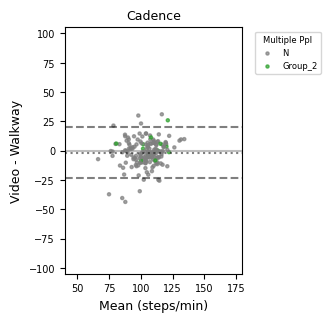

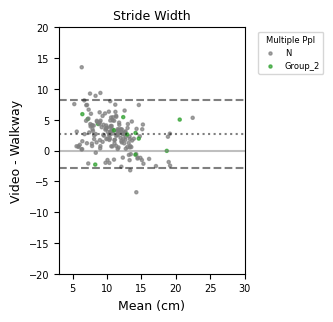

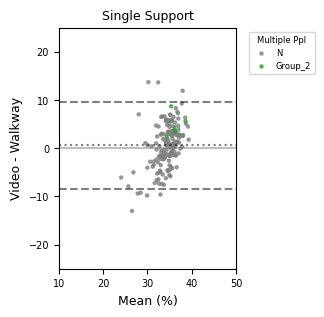

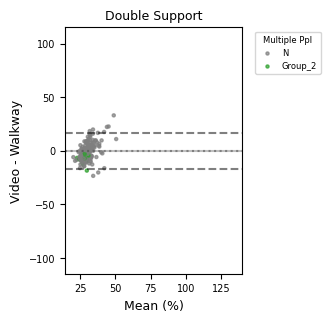

In [52]:
# multiple people in video 
bland_altman_plot(df = zv_pws_bw_MultPpl3_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_MultPpl3_Y_by_multPeople')

# None or part of body in part of video
bland_altman_plot(df = zv_pws_bw_MultPpl3_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_MultPpl3_N_by_multPeople')

### PWS Assistive Device Yes No 

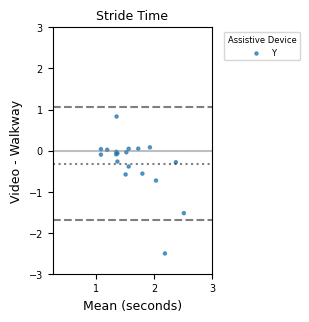

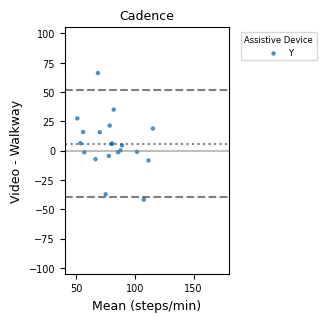

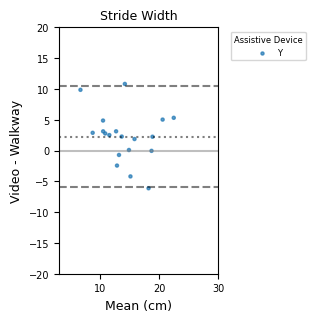

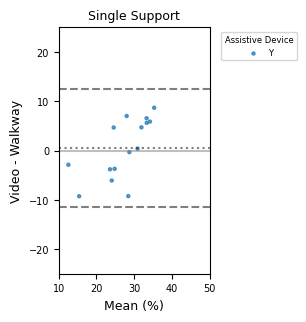

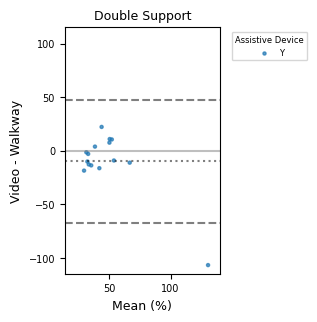

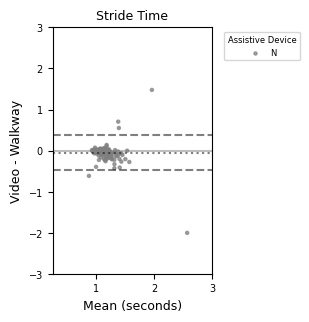

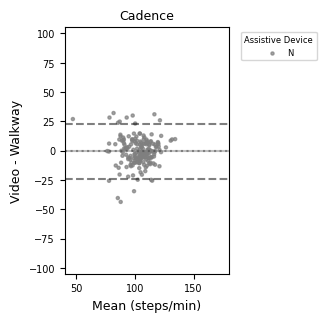

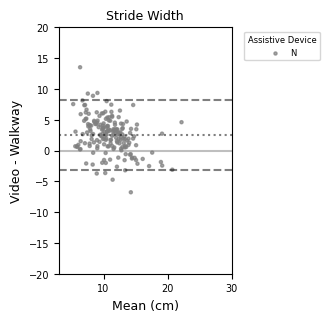

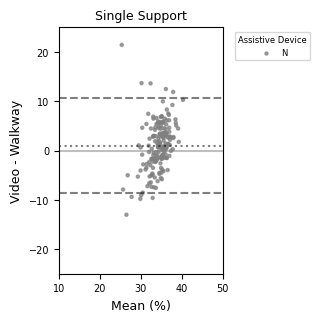

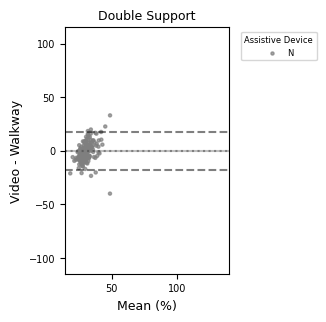

In [53]:
# using assistive device 
bland_altman_plot(df = zv_pws_bw_AD_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_AD_Y_by_AD')

# not using assistive device 
bland_altman_plot(df = zv_pws_bw_AD_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_AD_N_by_AD')

### PWS - (AD or multiple people) vs (no AD and no multiple people)

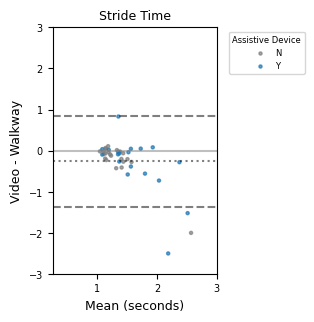

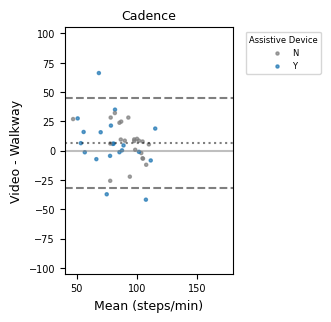

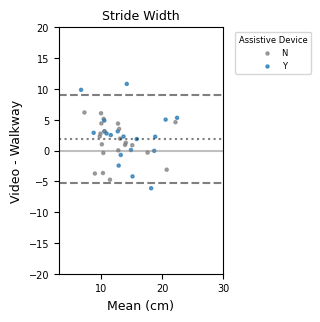

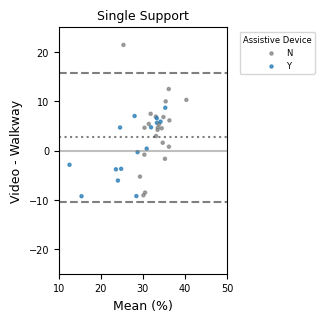

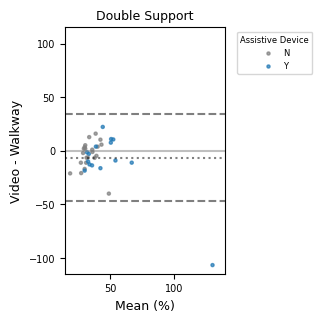

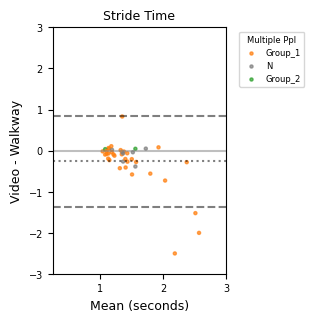

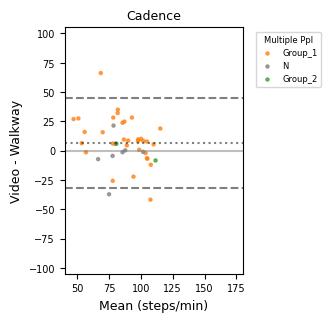

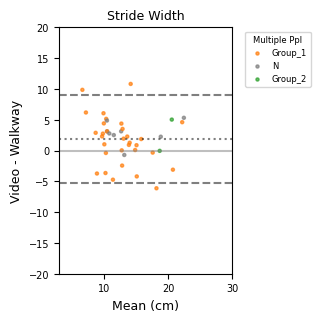

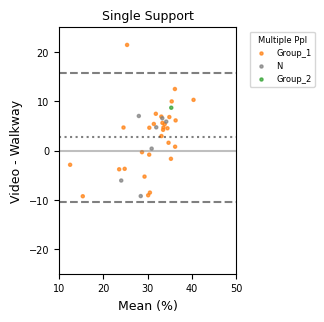

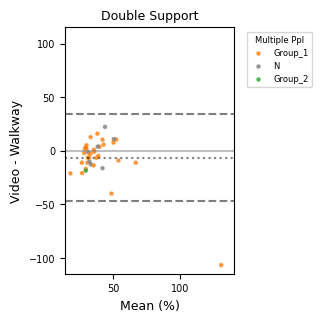

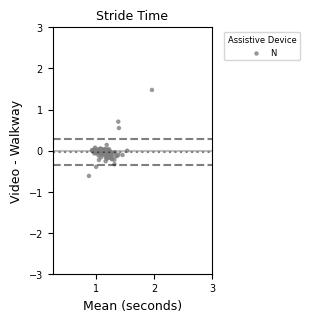

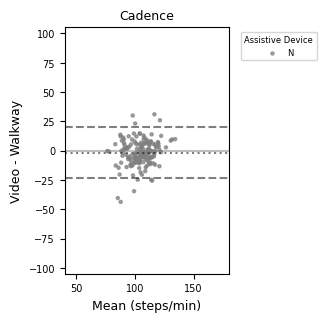

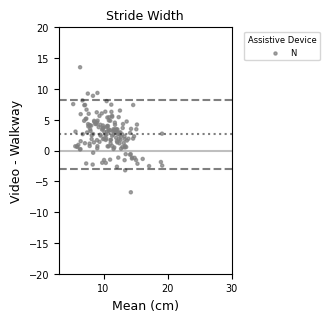

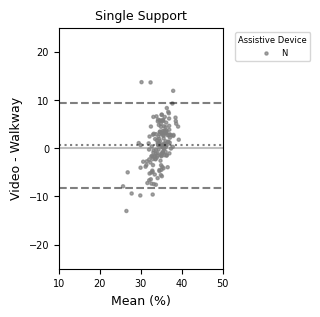

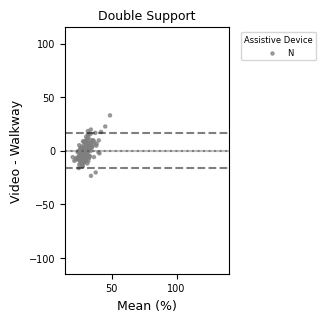

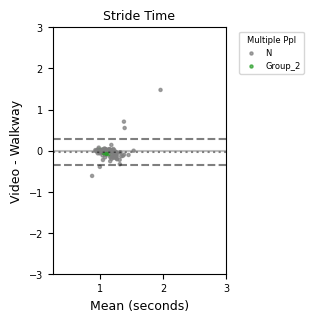

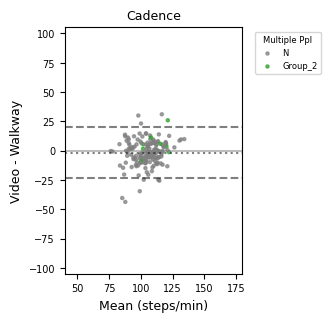

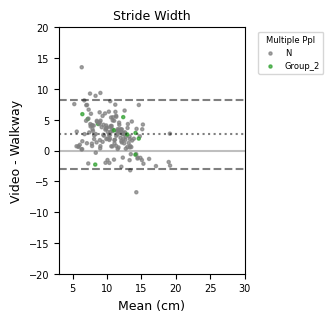

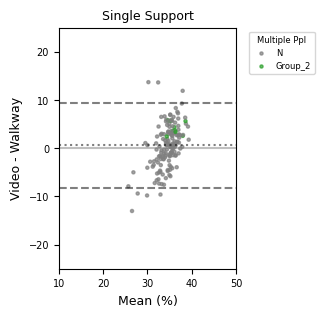

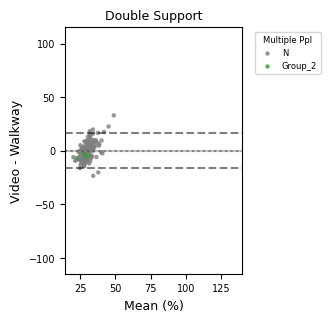

In [54]:
# AD or multiple people 
    # color by AD 
bland_altman_plot(df = zv_pws_bw_AD_MultPpl_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_AD_MultPpl_Y_by_AD')

    # color by multiple people 
bland_altman_plot(df = zv_pws_bw_AD_MultPpl_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_AD_MultPpl_Y_by_MultPpl')

# no AD and no multiple people  
    # color by AD 
bland_altman_plot(df = zv_pws_bw_AD_MultPpl_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_AD_MultPpl_N_by_AD')

    # color by multiple people 
bland_altman_plot(df = zv_pws_bw_AD_MultPpl_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_pws_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_pws_AD_MultPpl_N_by_MultPpl')

### FW all Videos 

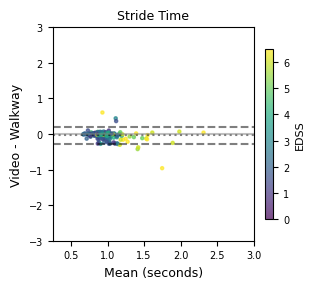

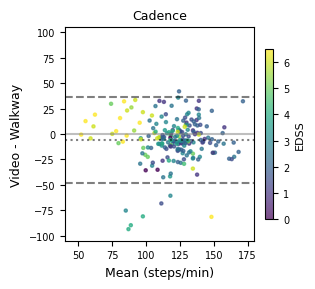

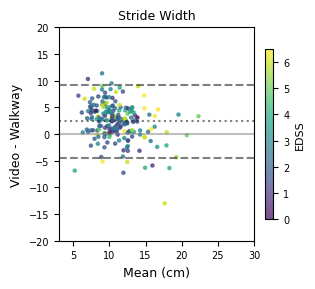

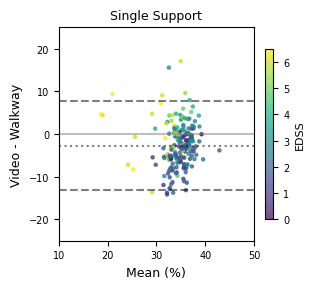

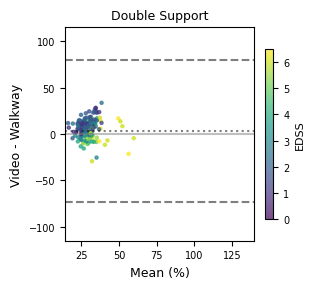

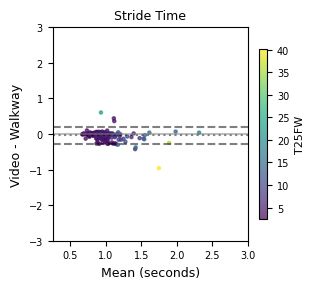

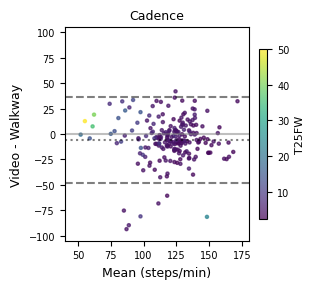

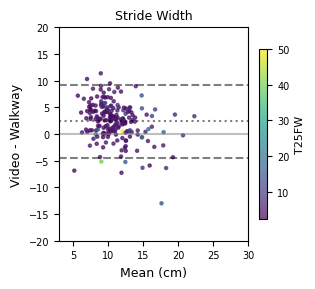

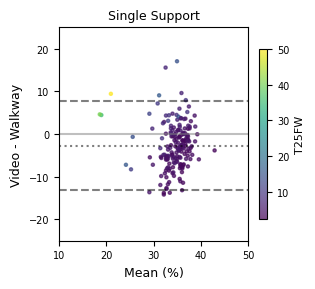

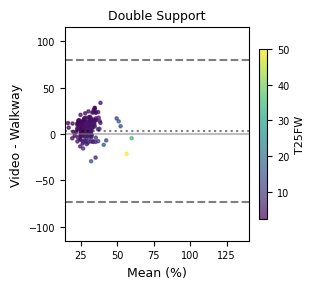

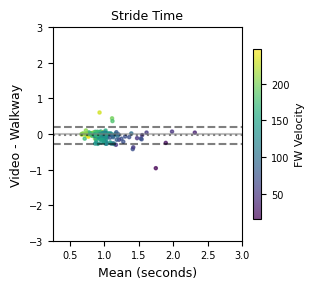

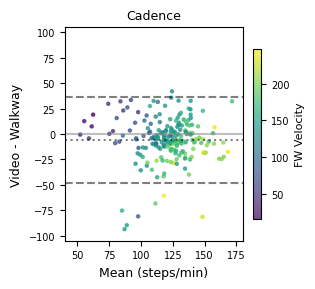

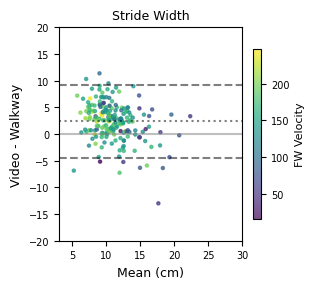

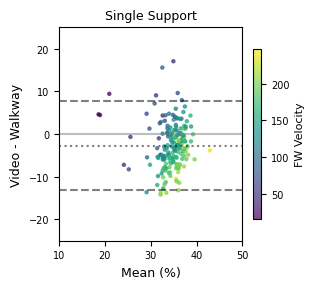

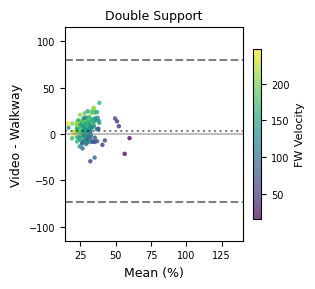

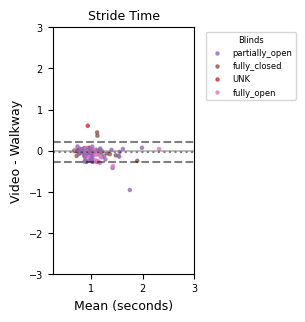

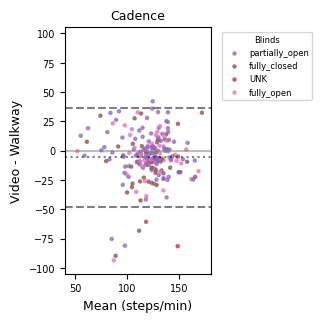

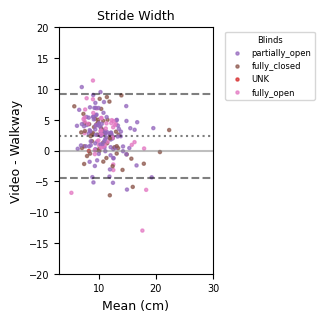

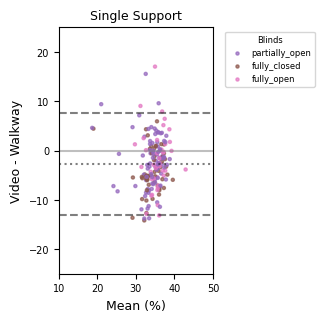

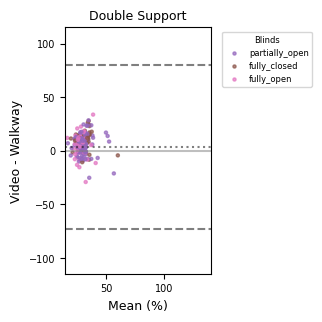

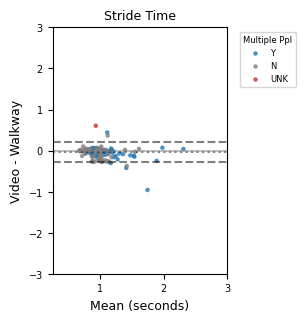

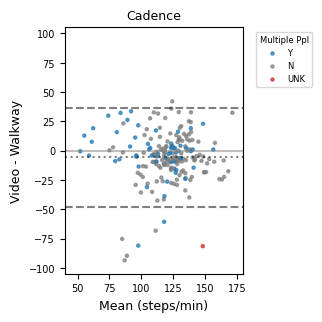

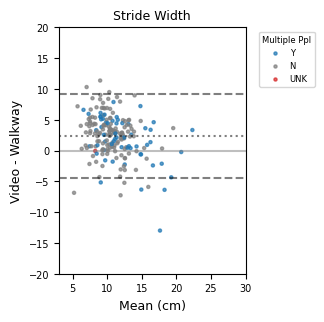

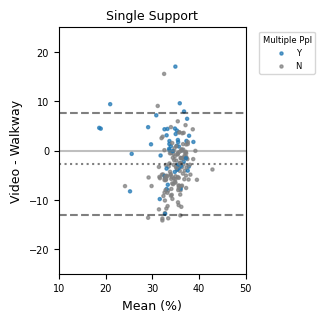

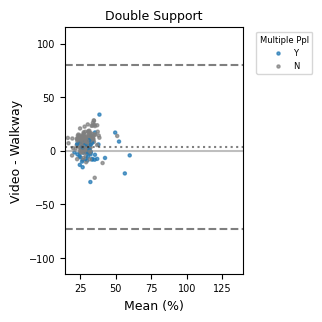

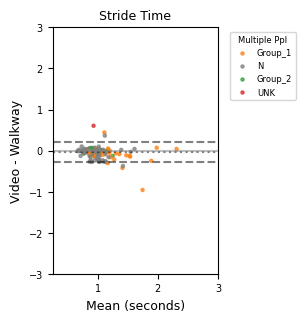

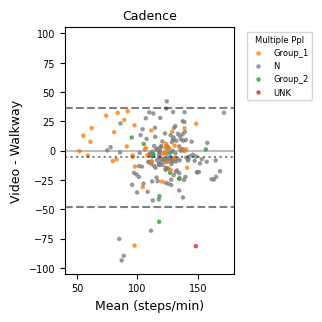

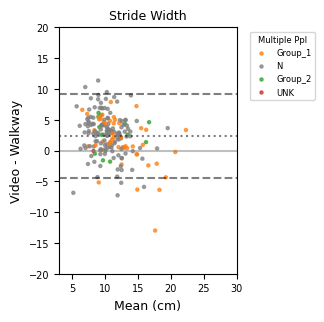

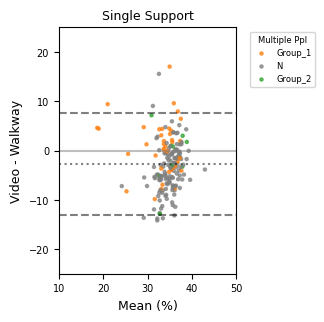

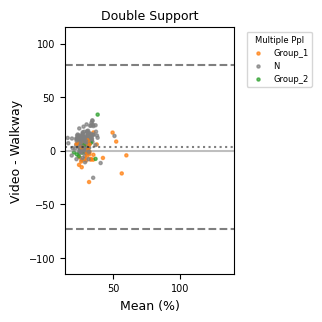

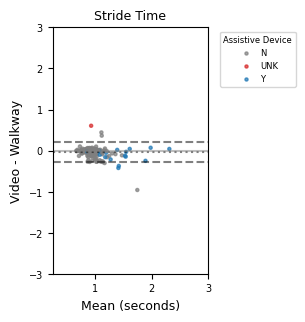

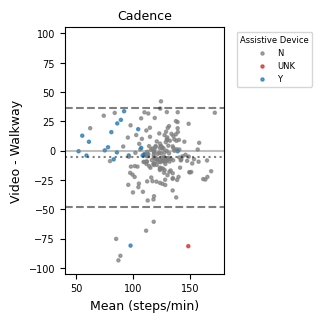

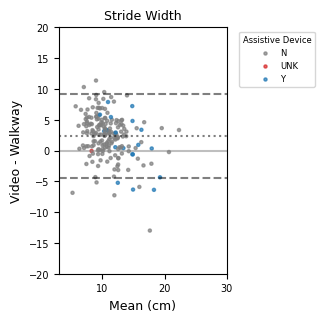

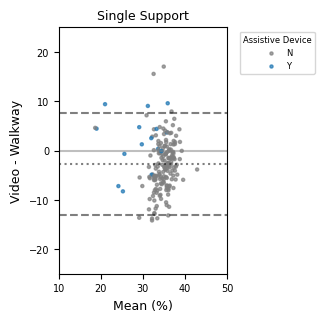

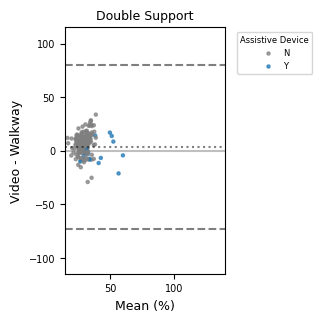

In [55]:
# FW 
# color by EDSS 
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'clean_EDSS', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_edss')

# color by T25FW 
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'clean_T25FW_Avg', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_t25fw')

# color by fast walking video velocity
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'FW_velocitycmsecmean', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_fw_vel')

# color by blind positions 
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'blinds', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_blinds')

# color by whether or not multiple people are in video 
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_multPeople')

# color by whether or not multiple people are in video 
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_multPeople3')

# color by use of assistive device  
bland_altman_plot(df = zv_fw_bw_clean_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_all_by_ADs')

### FW - multiple people YN
Separate BA plots for each group 

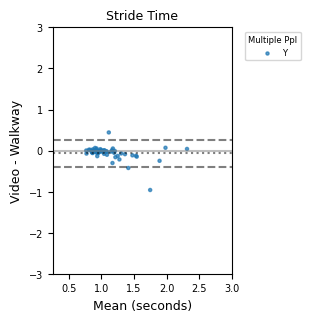

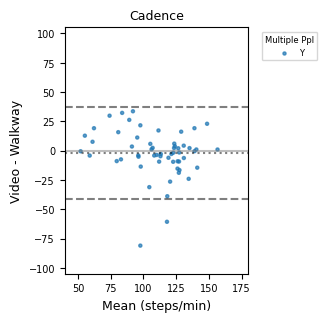

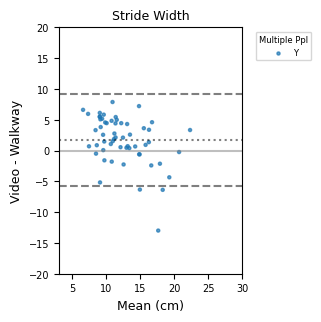

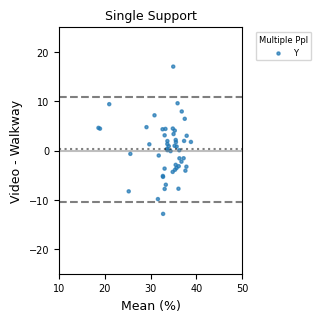

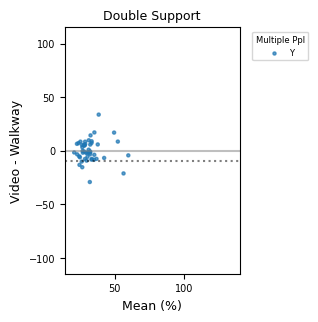

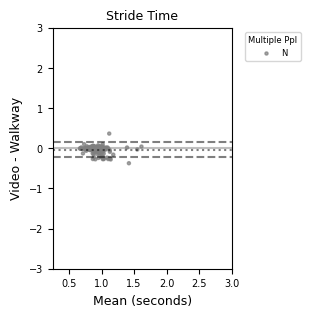

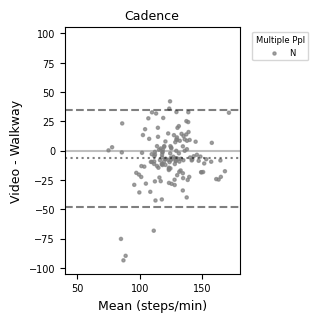

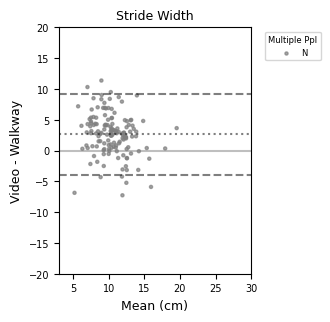

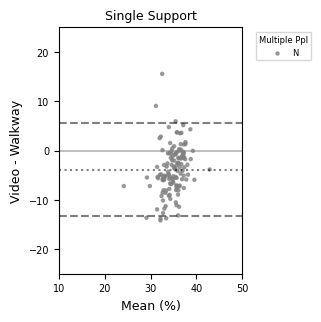

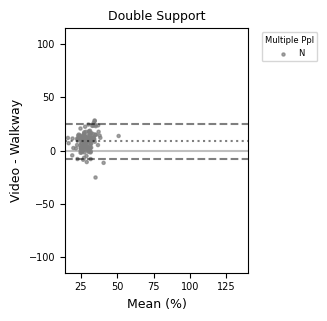

In [56]:
# Plot only videos with multiple people in video  
bland_altman_plot(df = zv_fw_bw_MultPpl_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_MultPpl_Y_by_multPeople')

# Plot only videos without multiple people in video  
bland_altman_plot(df = zv_fw_bw_MultPpl_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_MultPpl_N_by_multPeople')

### FW Multiple people - (None or part of body in part of video) vs (multiple person in video)

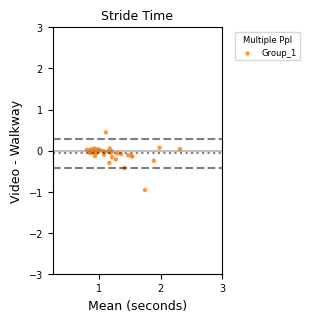

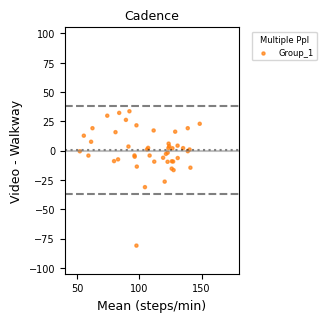

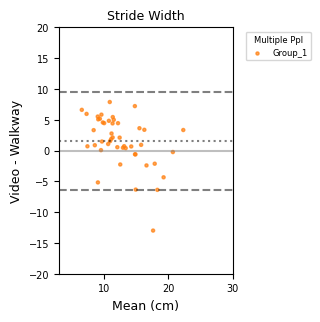

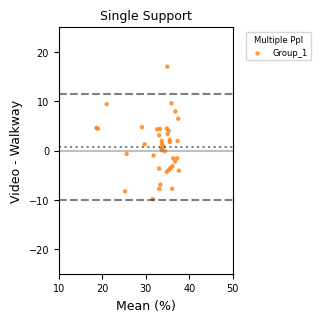

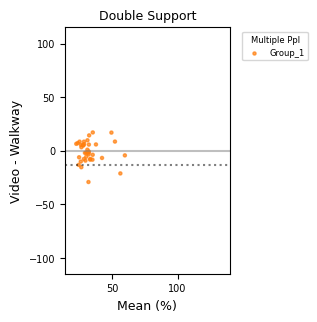

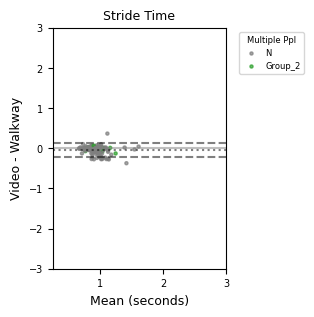

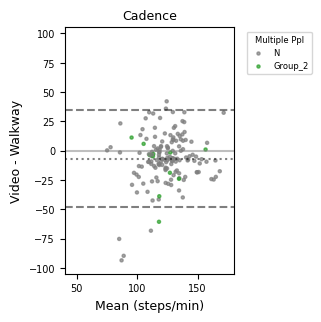

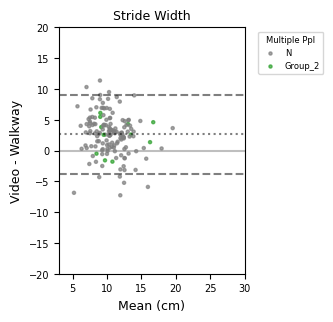

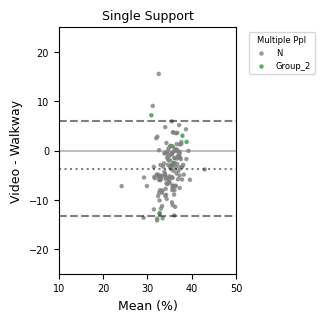

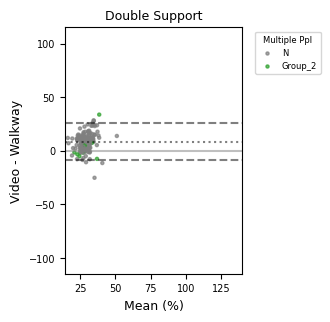

In [57]:
# multiple people in video 
bland_altman_plot(df = zv_fw_bw_MultPpl3_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_MultPpl3_Y_by_multPeople')

# None or part of body in part of video
bland_altman_plot(df = zv_fw_bw_MultPpl3_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_MultPpl3_N_by_multPeople')

### FW Assistive Device Yes No 

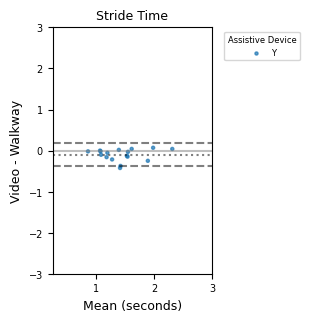

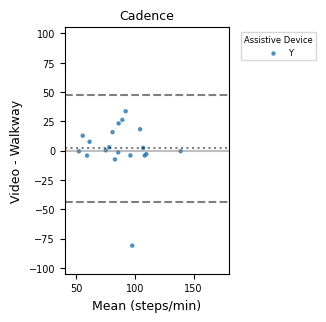

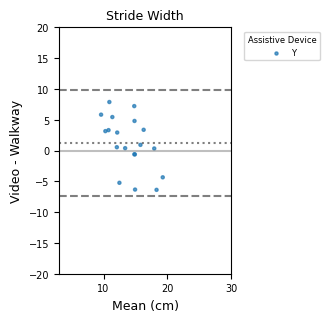

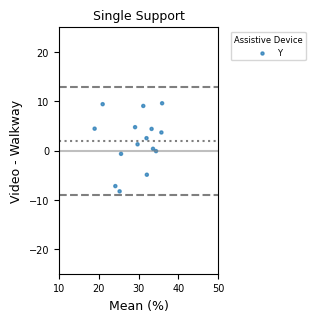

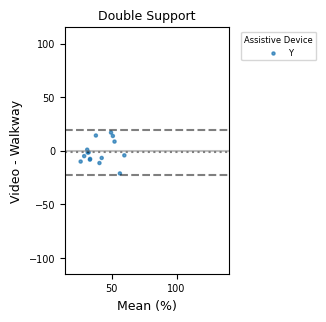

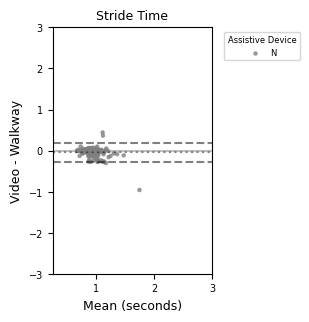

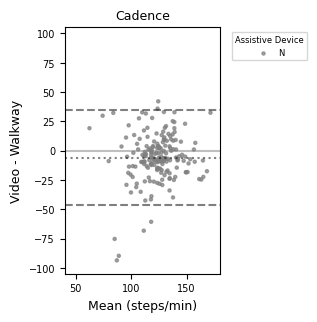

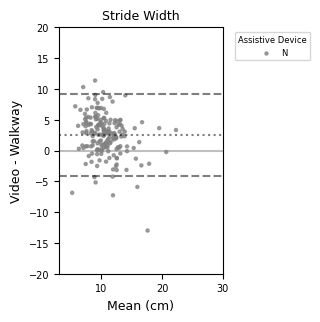

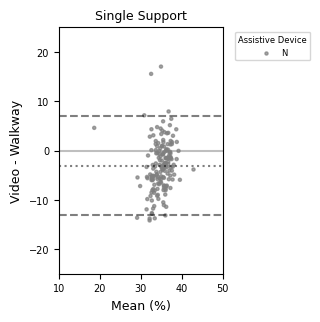

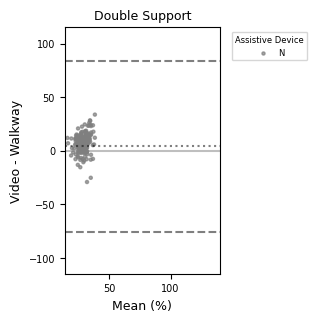

In [58]:
# using assistive device 
bland_altman_plot(df = zv_fw_bw_AD_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_AD_Y_by_AD')

# not using assistive device 
bland_altman_plot(df = zv_fw_bw_AD_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_AD_N_by_AD')

### FW - (AD or multiple people) vs (no AD and no multiple people)

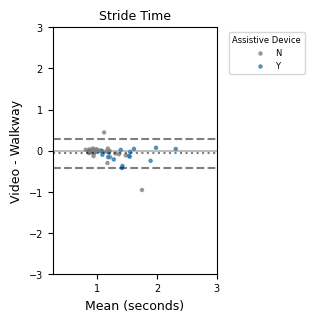

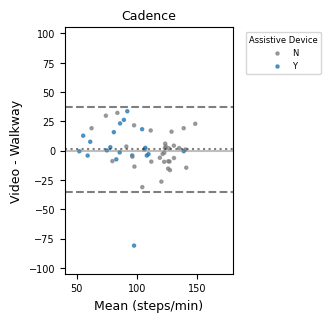

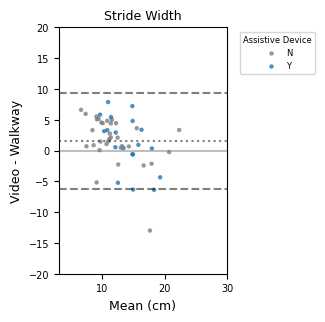

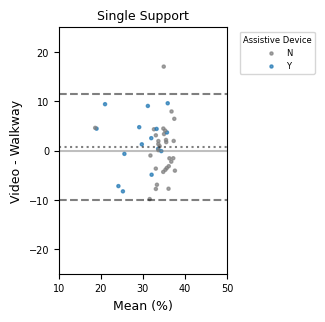

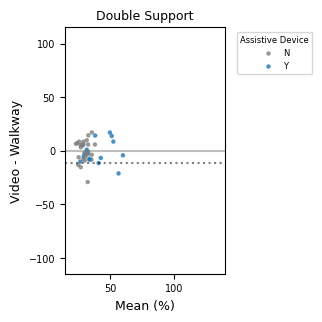

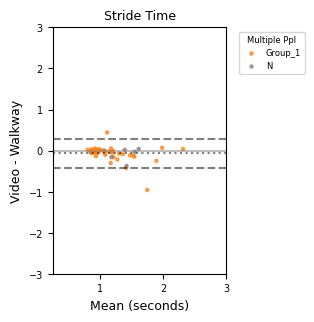

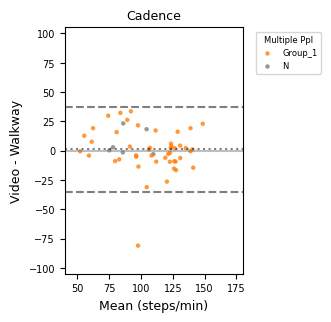

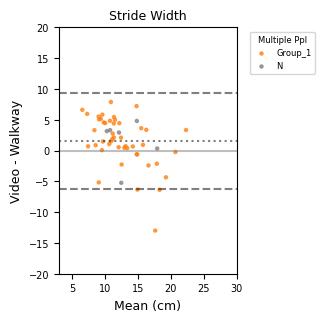

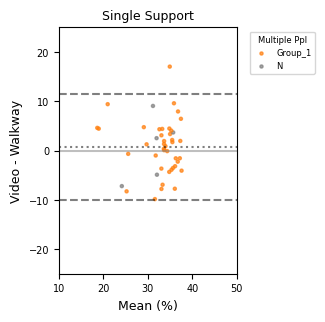

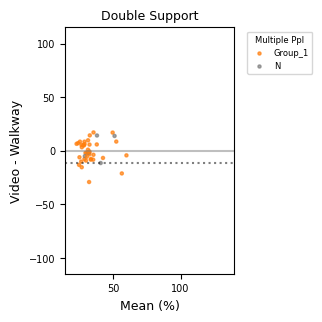

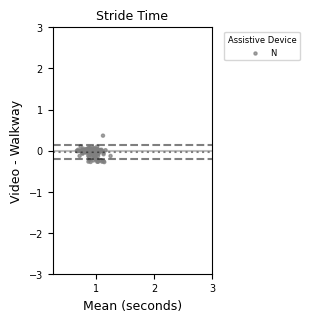

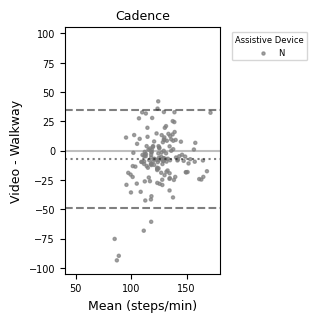

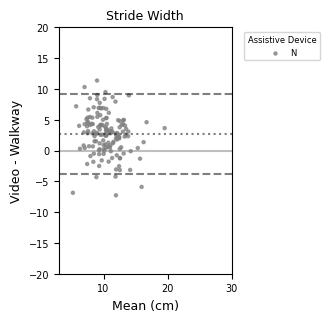

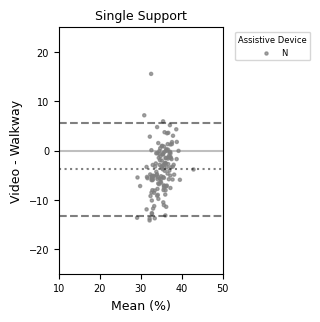

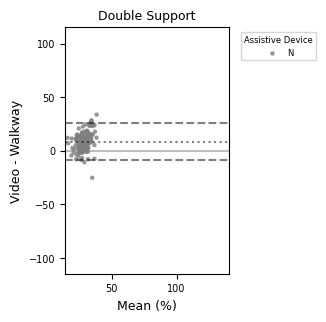

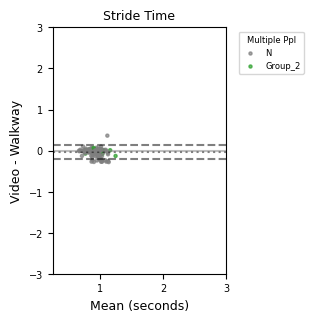

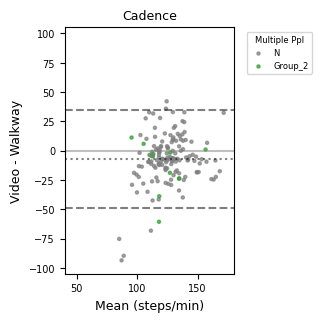

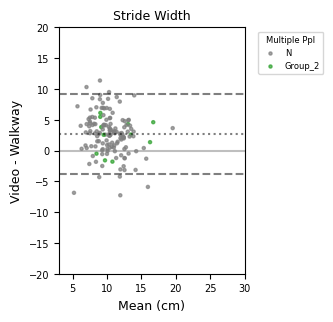

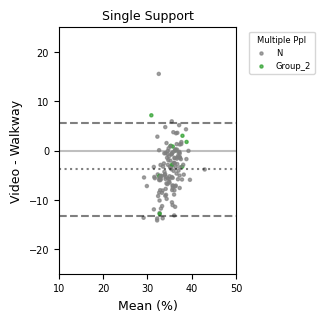

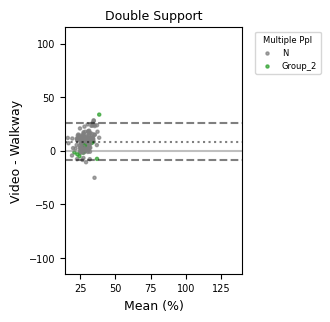

In [59]:
# AD or multiple people 
    # color by AD 
bland_altman_plot(df = zv_fw_bw_AD_MultPpl_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_AD_MultPpl_Y_by_AD')

    # color by multiple people 
bland_altman_plot(df = zv_fw_bw_AD_MultPpl_Y_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_AD_MultPpl_Y_by_MultPpl')

# no AD and no multiple people  
    # color by AD 
bland_altman_plot(df = zv_fw_bw_AD_MultPpl_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'assistive_device_YN', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_AD_MultPpl_N_by_AD')

    # color by multiple people 
bland_altman_plot(df = zv_fw_bw_AD_MultPpl_N_df, 
                  video_columns = zv_colnames, 
                  bw_columns = bw_fw_colnames, 
                  col_color_key = 'multiple_people_3', 
                  units = units, 
                  output_folder_path = bland_alt_out_path, 
                  subfolder_name = 'zeno_fw_AD_MultPpl_N_by_MultPpl')